# Ukrayna-Rusya Savaşı: Rusya'nın Askeri Ekipman Kayıpları Analizi

Bu notebook, Ukrayna-Rusya savaşı sırasında Rusya'nın günlük askeri ekipman kayıplarını içeren CSV dosyasının kapsamlı ve detaylı bir analizini sunmaktadır. Analiz aşağıdaki ana başlıkları kapsamaktadır:

1. Veri Seti İncelemesi
2. Genel Kayıp Analizi
3. Zaman Serisi ve Trend Analizi
4. Aykırı Değerler ve Önemli Olaylar
5. Korelasyon ve İlişkiler
6. Eksik Verinin Analize Etkisi
7. Görselleştirme
8. Sonuç ve Yorum

## 1. Gerekli Kütüphanelerin Import Edilmesi

Analiz için gerekli olan Python kütüphanelerini import edelim:

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import datetime as dt
from scipy import stats
import warnings

# Görselleştirmelerin daha güzel görünmesi için ayarlar
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Türkçe karakterlerin doğru görüntülenmesi için
plt.rcParams['axes.unicode_minus'] = False

# Notebook içindeki görsellerin boyutu
plt.rcParams['figure.figsize'] = (15, 8)

# Pandas ayarları
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 2. Veri Setinin Yüklenmesi ve İlk İnceleme

Rusya'nın kayıplarını içeren CSV dosyasını yükleyelim ve veri setinin yapısını anlamak için ilk birkaç satırı inceleyelim:

In [2]:
# CSV dosyasını pandas DataFrame'e yükleme
df = pd.read_csv('russia_losses_equipment.csv')

# İlk birkaç satırı görüntüleme
print("Veri setindeki ilk 5 kayıt:")
df.head()

Veri setindeki ilk 5 kayıt:


,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2025-06-22,1215,416,337,10964,22867,29432,1421,NaN,NaN,41579,28,1188,3920.00,NaN,NaN,52734.00,3376.00,1.00
1,2025-06-21,1214,416,337,10955,22865,29393,1421,NaN,NaN,41422,28,1188,3920.00,NaN,NaN,52617.00,3369.00,1.00
2,2025-06-20,1213,416,337,10954,22860,29374,1421,NaN,NaN,41299,28,1188,3920.00,NaN,NaN,52501.00,3369.00,1.00
3,2025-06-19,1212,416,337,10951,22853,29328,1420,NaN,NaN,41229,28,1187,3918.00,NaN,NaN,52420.00,3369.00,1.00
4,2025-06-18,1211,416,337,10947,22845,29265,1420,NaN,NaN,41165,28,1187,3916.00,NaN,NaN,52312.00,3369.00,1.00


In [3]:
# Veri setinin boyutlarını görme
print(f"Veri seti boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")

# Sütunların listesi ve veri tipleri
print("\nSütunlar ve veri tipleri:")
df.dtypes

Veri seti boyutu: 1214 satır, 19 sütun

Sütunlar ve veri tipleri:


date                          object
day                            int64
aircraft                       int64
helicopter                     int64
tank                           int64
APC                            int64
field artillery                int64
MRL                            int64
military auto                float64
fuel tank                    float64
drone                          int64
naval ship                     int64
anti-aircraft warfare          int64
special equipment            float64
mobile SRBM system           float64
greatest losses direction     object
vehicles and fuel tanks      float64
cruise missiles              float64
submarines                   float64
dtype: object

In [4]:
# Veri setinin istatistiksel özeti
print("Veri setinin istatistiksel özeti:")
df.describe().T  # Transpoz alınarak daha okunaklı görüntüleme

Veri setinin istatistiksel özeti:


,count,mean,std,min,25%,50%,75%,max
day,1214.00,608.50,350.60,2.00,305.25,608.50,911.75,1215.00
aircraft,1214.00,309.40,68.16,10.00,283.00,320.00,367.00,416.00
helicopter,1214.00,286.54,63.35,7.00,267.00,324.00,328.00,337.00
tank,1214.00,5595.59,3168.56,80.00,3012.25,5108.50,8532.00,10964.00
APC,1214.00,11194.63,6400.08,516.00,6011.75,9683.00,16591.00,22867.00
field artillery,1214.00,9747.99,8810.95,49.00,1992.25,7103.00,17295.75,29432.00
MRL,1214.00,790.06,407.35,4.00,418.00,830.50,1166.75,1421.00
military auto,65.00,1047.51,466.16,100.00,600.00,1178.00,1437.00,1701.00
fuel tank,65.00,69.32,7.55,60.00,60.00,73.00,76.00,76.00
drone,1214.00,9475.89,10385.20,0.00,1706.25,5367.50,14018.25,41579.00


## 3. Eksik veya Tutarsız Verilerin İncelenmesi

Veri setindeki eksik veya tutarsız değerleri tespit edelim:

In [6]:
# Eksik değerlerin tespiti
eksik_degerler = df.isnull().sum()

# Sütun bazında eksik değer yüzdeleri
eksik_deger_yuzdesi = (eksik_degerler / len(df)) * 100

# Eksik değerleri içeren sütunları görüntüleme
eksik_veriler = pd.DataFrame({
    'Eksik Değer Sayısı': eksik_degerler,
    'Eksik Değer Yüzdesi (%)': eksik_deger_yuzdesi
})

# Sadece eksik değer içeren sütunları görüntüle
print("Eksik değer içeren sütunlar:")
eksik_veriler[eksik_veriler['Eksik Değer Sayısı'] > 0]

Eksik değer içeren sütunlar:


,Eksik Değer Sayısı,Eksik Değer Yüzdesi (%)
military auto,1149,94.65
fuel tank,1149,94.65
special equipment,19,1.57
mobile SRBM system,1178,97.03
greatest losses direction,1011,83.28
vehicles and fuel tanks,65,5.35
cruise missiles,65,5.35
submarines,566,46.62


In [7]:
# Tarih sütununu datetime formatına çevirme
df['date'] = pd.to_datetime(df['date'])

# Veri tiplerini kontrol etme
print("Düzenleme sonrası veri tipleri:")
df.dtypes

Düzenleme sonrası veri tipleri:


date                         datetime64[ns]
day                                   int64
aircraft                              int64
helicopter                            int64
tank                                  int64
APC                                   int64
field artillery                       int64
MRL                                   int64
military auto                       float64
fuel tank                           float64
drone                                 int64
naval ship                            int64
anti-aircraft warfare                 int64
special equipment                   float64
mobile SRBM system                  float64
greatest losses direction            object
vehicles and fuel tanks             float64
cruise missiles                     float64
submarines                          float64
dtype: object

## 4. Verinin Zaman Aralığı ve Toplam Gün Sayısı

Veri setinin kapsadığı zaman aralığını ve toplam gün sayısını belirleyelim:

In [8]:
# İlk ve son tarih
ilk_tarih = df['date'].min()
son_tarih = df['date'].max()

# Toplam gün sayısı
toplam_gun = (son_tarih - ilk_tarih).days + 1

print(f"Veri seti zaman aralığı: {ilk_tarih.date()} - {son_tarih.date()}")
print(f"Toplam gün sayısı: {toplam_gun} gün")

# Tarih sırasına göre sıralama
df = df.sort_values(by='date')

# Veri setindeki zaman aralığının ne kadar süreye tekabül ettiğini hesaplama
print(f"Veri seti yaklaşık {toplam_gun // 30} ay veya {toplam_gun // 365} yıl {(toplam_gun % 365) // 30} ay süreyi kapsamaktadır.")

Veri seti zaman aralığı: 2022-02-25 - 2025-06-22
Toplam gün sayısı: 1214 gün
Veri seti yaklaşık 40 ay veya 3 yıl 3 ay süreyi kapsamaktadır.


## 5. Genel Kayıp Analizi

### 5.1. Her Ekipman Türü İçin Toplam Kayıplar ve Yüzdesel Dağılım

Veri setinde yer alan her ekipman türü için toplam kayıpları ve bunların yüzdesel dağılımını hesaplayalım:

In [10]:
# Ekipman sütunlarını belirleme (date ve day dışındaki sütunlar)
ekipman_sutunlari = df.columns.drop(['date', 'day', 'greatest losses direction'])

# Son güdeki kayıplar (en güncel durum)
son_gun_kayiplari = df.iloc[-1][ekipman_sutunlari]

# NaN değerleri 0 ile değiştirme
son_gun_kayiplari = son_gun_kayiplari.fillna(0)

# Toplam kayıpları hesaplama
toplam_kayiplar = son_gun_kayiplari.astype(float)

# Yüzdesel dağılımı hesaplama
yuzdesel_dagilim = (toplam_kayiplar / toplam_kayiplar.sum()) * 100

# Sonucu bir DataFrame'e dönüştürme
kayip_analizi = pd.DataFrame({
    'Ekipman Türü': ekipman_sutunlari,
    'Toplam Kayıp': toplam_kayiplar.values,
    'Yüzde (%)': yuzdesel_dagilim.values
})

# Kayıp sayısına göre büyükten küçüğe sıralama
kayip_analizi = kayip_analizi.sort_values(by='Toplam Kayıp', ascending=False)

# Sonucu görüntüleme
kayip_analizi

,Ekipman Türü,Toplam Kayıp,Yüzde (%)
13,vehicles and fuel tanks,52734.00,31.34
8,drone,41579.00,24.71
4,field artillery,29432.00,17.49
3,APC,22867.00,13.59
2,tank,10964.00,6.52
11,special equipment,3920.00,2.33
14,cruise missiles,3376.00,2.01
5,MRL,1421.00,0.84
10,anti-aircraft warfare,1188.00,0.71
0,aircraft,416.00,0.25


### 5.2. En Çok ve En Az Kayıp Verilen Ekipman Türleri

Veriler ışığında, en çok ve en az kayıp verilen ekipman türlerini belirleyelim:

In [12]:
# En çok kayıp verilen 5 ekipman türü
en_cok_kayip = kayip_analizi.head(5)
print("En çok kayıp verilen 5 ekipman türü:")
print(en_cok_kayip)

# En az kayıp verilen 5 ekipman türü
en_az_kayip = kayip_analizi.tail(5)
print("\nEn az kayıp verilen 5 ekipman türü:")
print(en_az_kayip)

# En çok kayıp verilen ekipman türünü bulma
en_cok_kayip_turu = kayip_analizi.iloc[0]['Ekipman Türü']
en_cok_kayip_sayisi = kayip_analizi.iloc[0]['Toplam Kayıp']
print(f"\nEn çok kayıp verilen ekipman türü: {en_cok_kayip_turu} ({int(en_cok_kayip_sayisi)} adet)")

# En az kayıp verilen ekipman türünü bulma
en_az_kayip_turu = kayip_analizi.iloc[-1]['Ekipman Türü']
en_az_kayip_sayisi = kayip_analizi.iloc[-1]['Toplam Kayıp']
print(f"En az kayıp verilen ekipman türü: {en_az_kayip_turu} ({int(en_az_kayip_sayisi)} adet)")


En çok kayıp verilen 5 ekipman türü:
               Ekipman Türü  Toplam Kayıp  Yüzde (%)
13  vehicles and fuel tanks      52734.00      31.34
8                     drone      41579.00      24.71
4           field artillery      29432.00      17.49
3                       APC      22867.00      13.59
2                      tank      10964.00       6.52

En az kayıp verilen 5 ekipman türü:
          Ekipman Türü  Toplam Kayıp  Yüzde (%)
9           naval ship         28.00       0.02
15          submarines          1.00       0.00
6        military auto          0.00       0.00
7            fuel tank          0.00       0.00
12  mobile SRBM system          0.00       0.00

En çok kayıp verilen ekipman türü: vehicles and fuel tanks (52734 adet)
En az kayıp verilen ekipman türü: mobile SRBM system (0 adet)


### 5.3. Kayıpların Görselleştirilmesi

Kümülatif kayıpları görselleştirerek daha iyi anlamamız için çeşitli grafikler hazırlayalım:

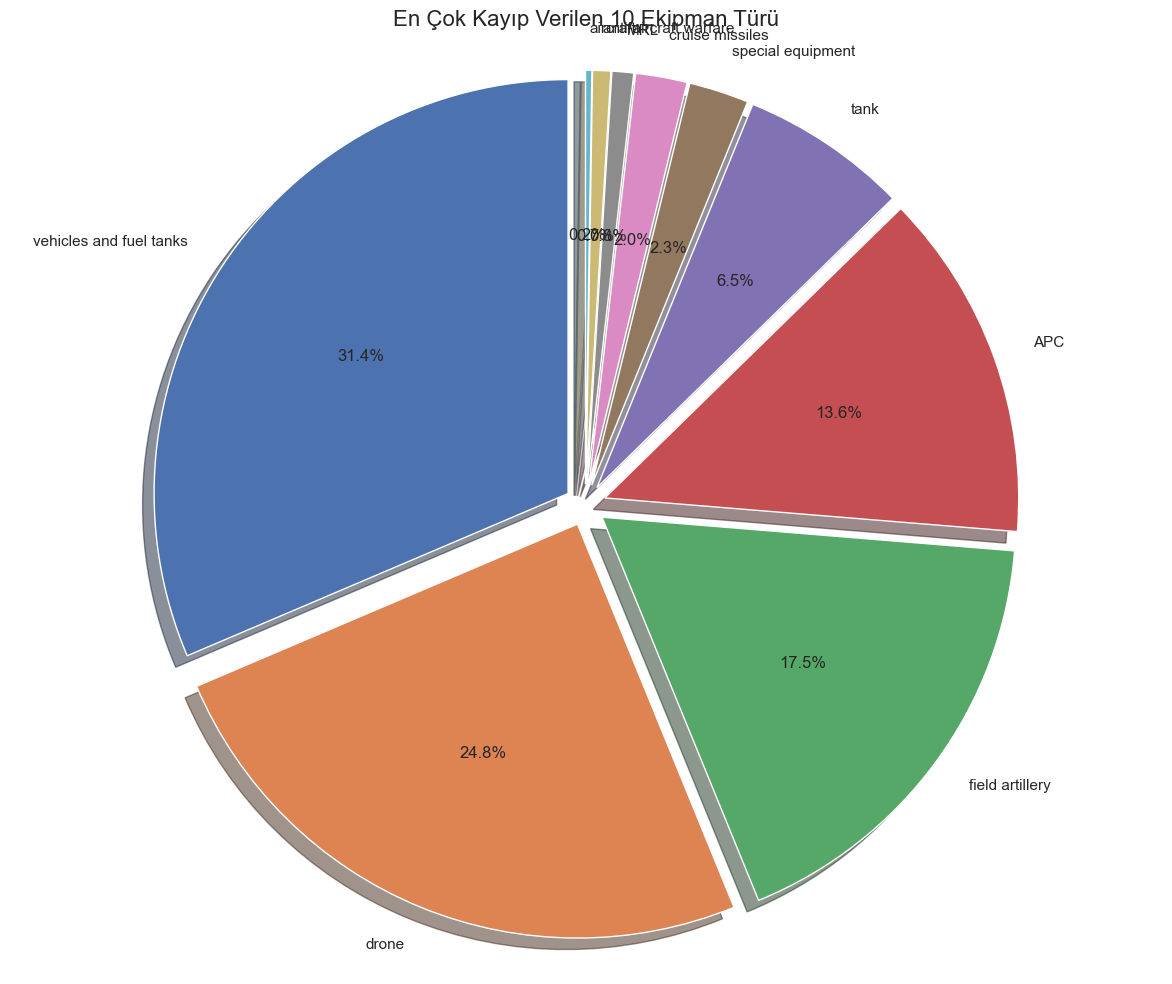

In [13]:
# Kayıpların pasta görselleştirmesi (en çok kayıp verilen ilk 10 ekipman)
top_10_kayiplar = kayip_analizi.head(10).copy()

# Pasta grafik
plt.figure(figsize=(12, 10))
pie = plt.pie(top_10_kayiplar['Toplam Kayıp'], 
            labels=top_10_kayiplar['Ekipman Türü'], 
            autopct='%1.1f%%', 
            startangle=90, 
            shadow=True, 
            explode=[0.05] * len(top_10_kayiplar))

plt.title('En Çok Kayıp Verilen 10 Ekipman Türü', fontsize=16)
plt.axis('equal')  # Görseli daire şeklinde tut
plt.tight_layout()
plt.show()

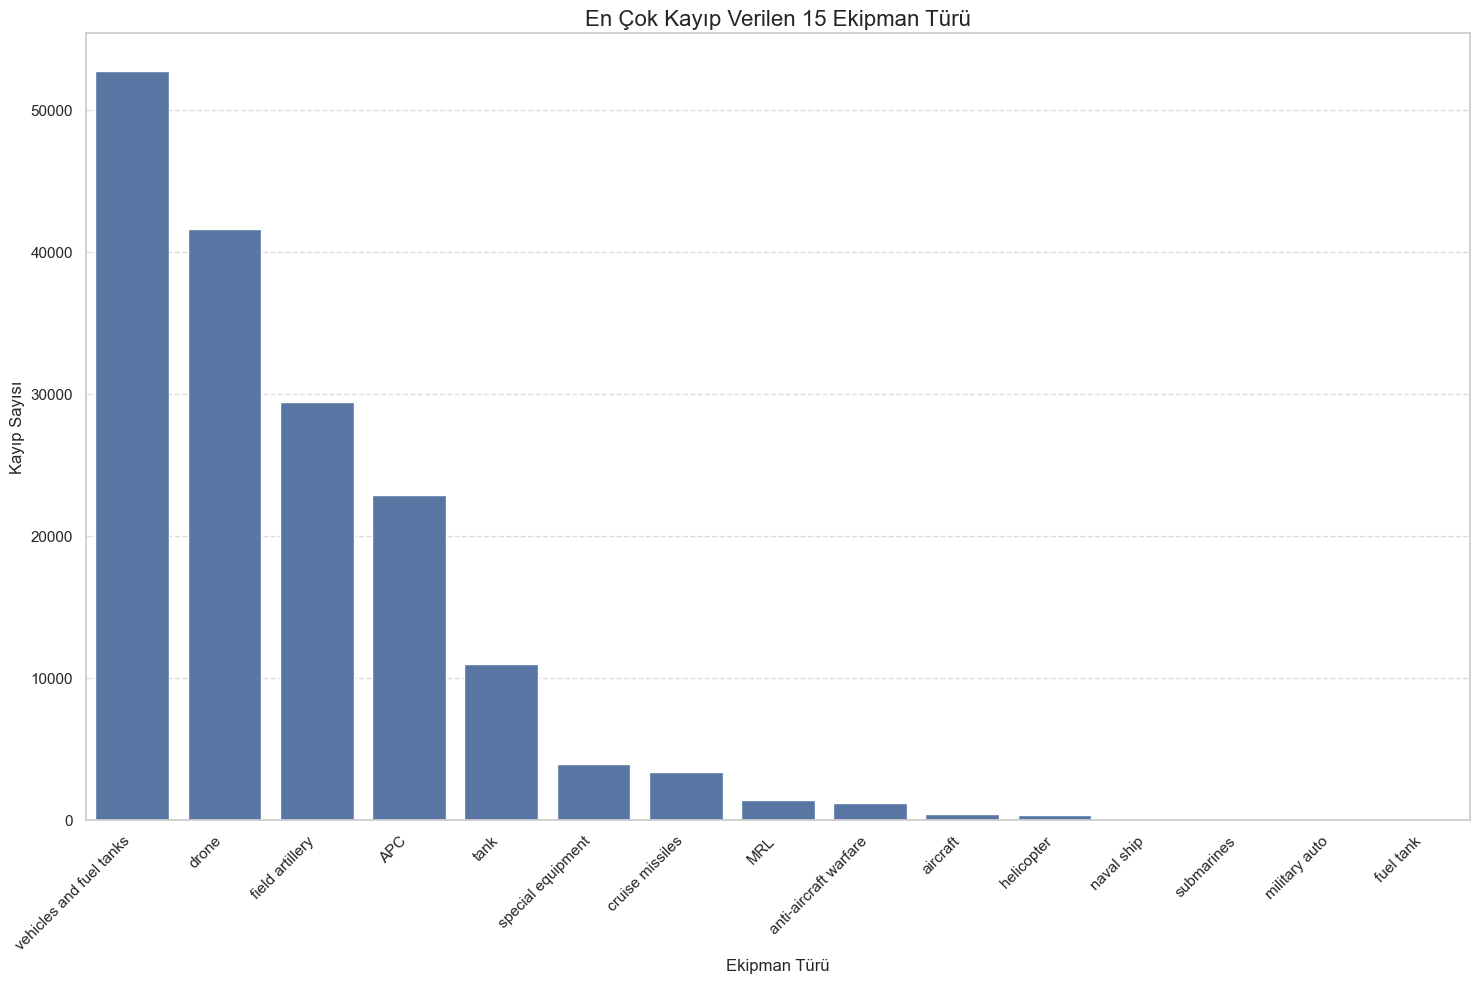

In [14]:
# Kayıpların çubuk grafik görselleştirmesi
plt.figure(figsize=(15, 10))
sns.barplot(x='Ekipman Türü', y='Toplam Kayıp', data=kayip_analizi.head(15))
plt.title('En Çok Kayıp Verilen 15 Ekipman Türü', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Kayıp Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 5.4. Kümülatif Kayıpların Zaman İçindeki Değişimi

Çeşitli ekipman türlerinin kümülatif kayıplarının zaman içindeki değişimini incelemek için zaman serisi grafikleri oluşturalım:

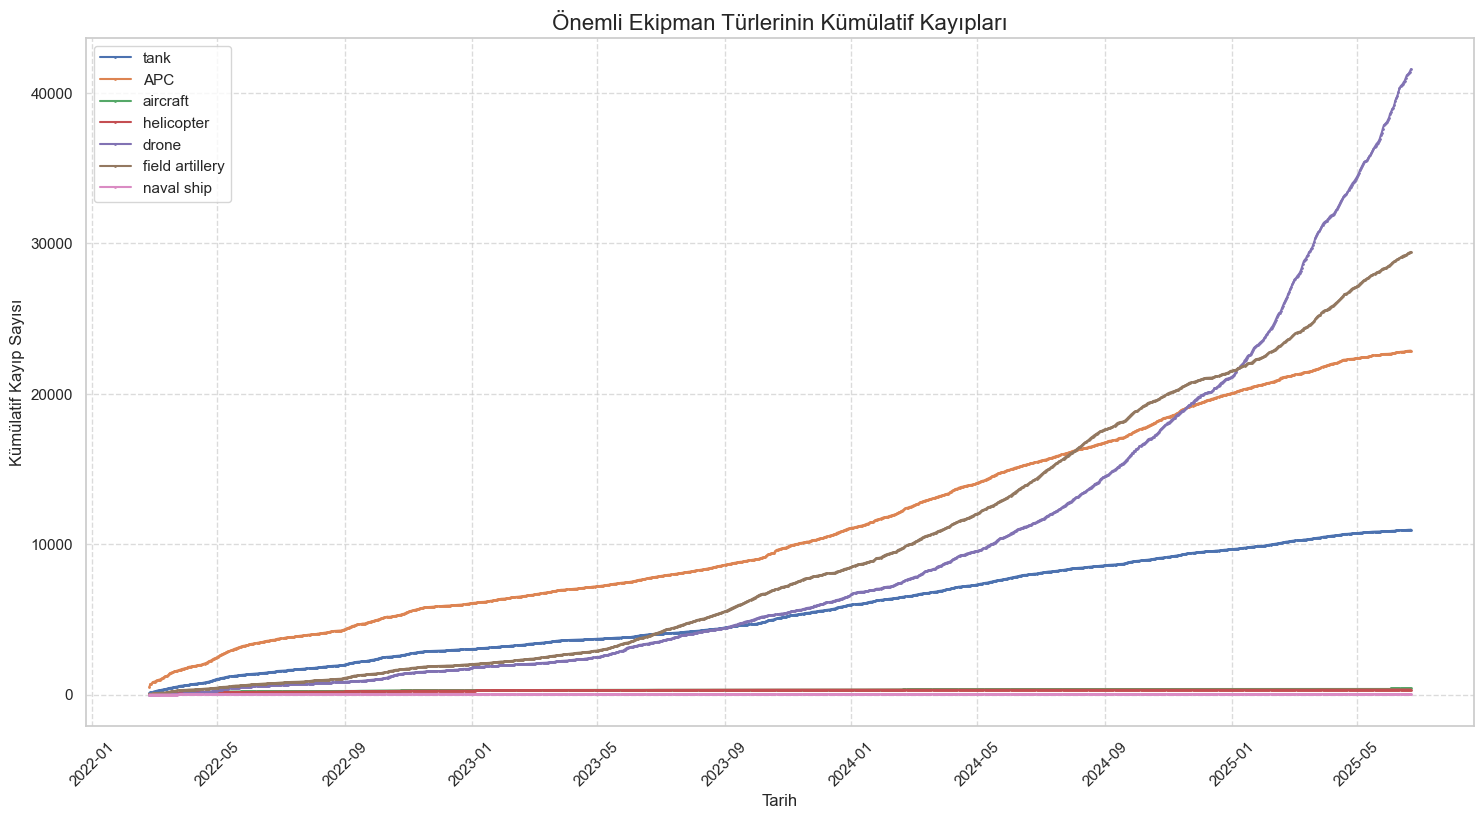

In [15]:
# Önemli ekipman türlerini seçelim
onemli_ekipmanlar = ['tank', 'APC', 'aircraft', 'helicopter', 'drone', 'field artillery', 'naval ship']

# Önemli ekipmanların kümülatif kayıplarının zaman içindeki değişimi
plt.figure(figsize=(15, 8))

for ekipman in onemli_ekipmanlar:
    try:
        plt.plot(df['date'], df[ekipman], marker='.', markersize=2, label=ekipman)
    except:
        print(f"{ekipman} sütunu bulunamadı veya hata oluştu.")

plt.title('Önemli Ekipman Türlerinin Kümülatif Kayıpları', fontsize=16)
plt.xlabel('Tarih')
plt.ylabel('Kümülatif Kayıp Sayısı')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [17]:
# Plotly ile interaktif grafik oluşturma
fig = px.line(df, x='date', y=onemli_ekipmanlar, title='Rusya\'nın Önemli Ekipman Kayıplarının Zaman İçindeki Değişimi')
fig.update_layout(
    xaxis_title='Tarih',
    yaxis_title='Kümülatif Kayıp Sayısı',
    legend_title='Ekipman Türleri',
    hovermode='x unified',
    height=600
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## 6. Zaman Serisi ve Trend Analizi

Verinin zaman boyutundaki değişimini daha iyi anlamak için aylık ve yıllık bazda trendleri analiz edelim.

In [18]:
# Ay ve yıl bilgilerini oluşturma
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_name'] = df['date'].dt.month_name()
df['week'] = df['date'].dt.isocalendar().week

# Ay ve yıl bilgilerinden yıl-ay formatında yeni bir sütun oluşturma
df['year_month'] = df['date'].dt.strftime('%Y-%m')

In [19]:
# Günlük kayıp değişimlerini hesaplama
df_gunluk_degisim = df.copy()

# Önemli ekipman türleri için günlük değişimleri hesaplama
for ekipman in onemli_ekipmanlar:
    df_gunluk_degisim[f'{ekipman}_daily_change'] = df_gunluk_degisim[ekipman].diff()

# İlk satırdaki NaN değerleri 0 ile doldurma
df_gunluk_degisim = df_gunluk_degisim.fillna(0)

# Günlük değişim sütunları
gunluk_degisim_sutunlari = [f'{ekipman}_daily_change' for ekipman in onemli_ekipmanlar]

# Günlük ortalama kayıplar
gunluk_ortalama = df_gunluk_degisim[gunluk_degisim_sutunlari].mean()

print("Günlük ortalama kayıplar:")
print(gunluk_ortalama)

Günlük ortalama kayıplar:
tank_daily_change               8.97
APC_daily_change               18.41
aircraft_daily_change           0.33
helicopter_daily_change         0.27
drone_daily_change             34.25
field artillery_daily_change   24.20
naval ship_daily_change         0.02
dtype: float64


In [20]:
# Aylık kayıp analizi
aylık_kayiplar = df.groupby('year_month')[onemli_ekipmanlar].last()

# Aylık değişimleri hesaplama
aylık_degisimler = aylık_kayiplar.diff().fillna(0)

# En yüksek aylık kayıp olan 5 ayı görüntüleme
print("En yüksek aylık tank kayıbı olan 5 ay:")
print(aylık_degisimler['tank'].sort_values(ascending=False).head(5))

print("\nEn yüksek aylık drone kayıbı olan 5 ay:")
print(aylık_degisimler['drone'].sort_values(ascending=False).head(5))

En yüksek aylık tank kayıbı olan 5 ay:
year_month
2023-10   520.00
2022-03   464.00
2023-12   426.00
2024-05   421.00
2022-04   394.00
Name: tank, dtype: float64

En yüksek aylık drone kayıbı olan 5 ay:
year_month
2025-03   4142.00
2025-05   3926.00
2025-02   3701.00
2025-06   3364.00
2025-04   2873.00
Name: drone, dtype: float64


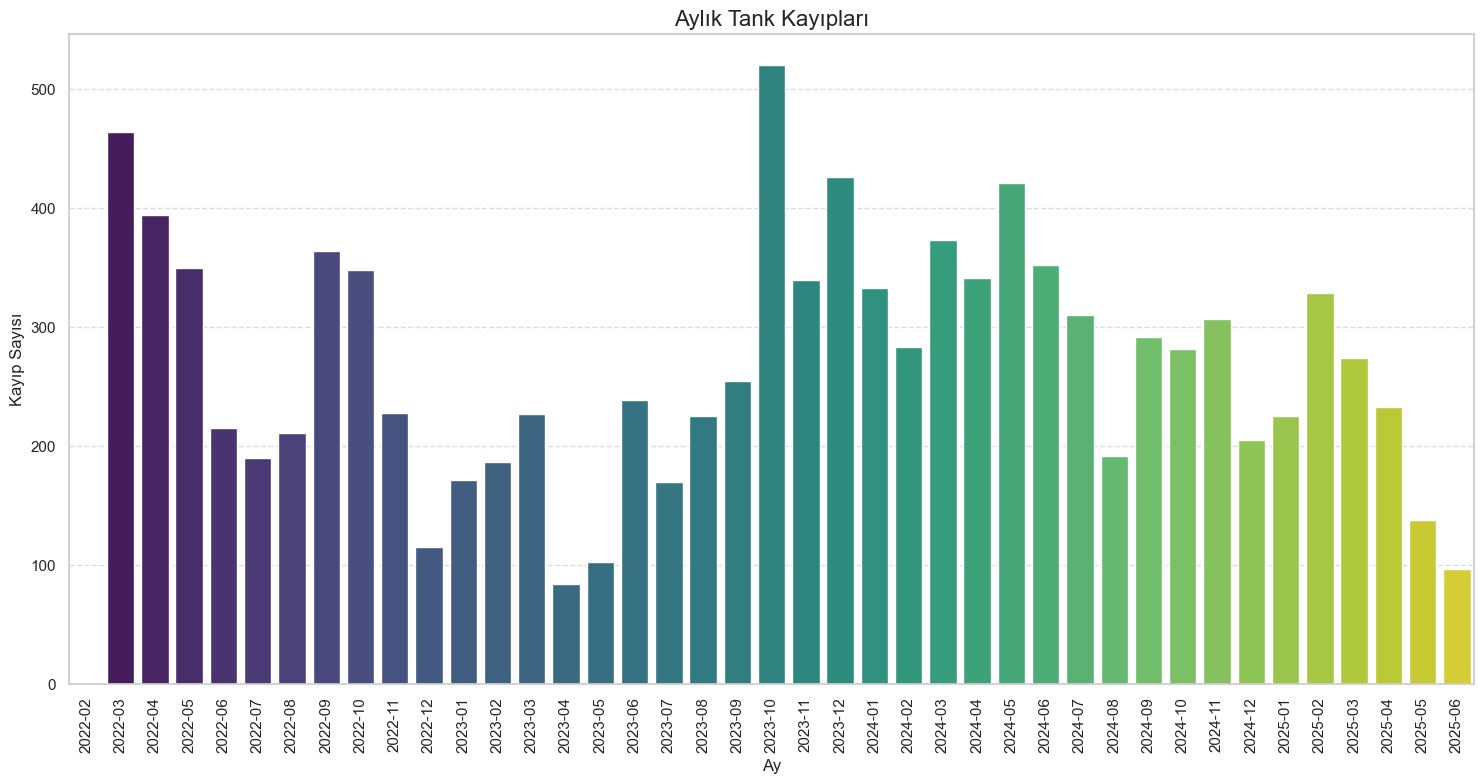

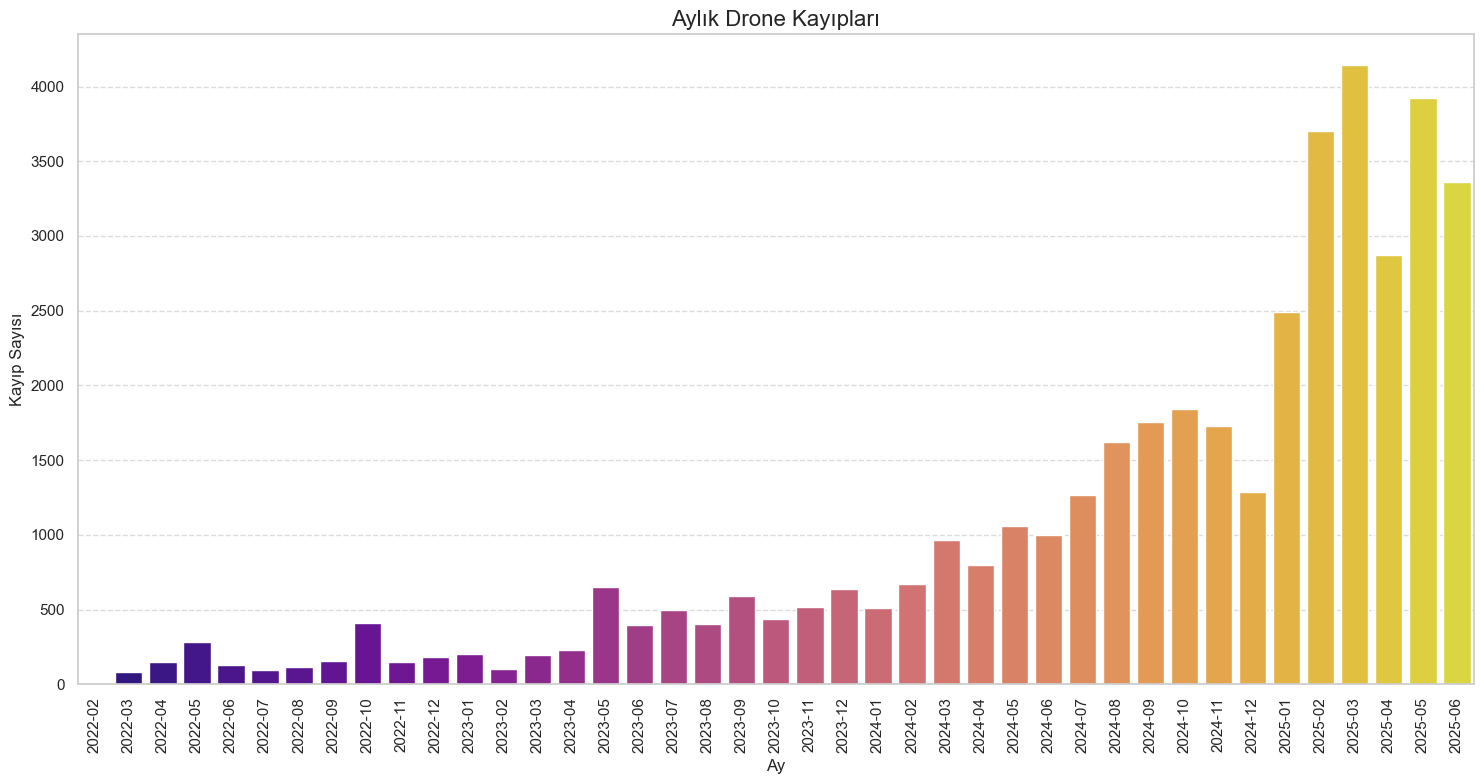

In [21]:
# Aylık tank kayıplarını görselleştirme
plt.figure(figsize=(15, 8))
sns.barplot(x=aylık_degisimler.index, y=aylık_degisimler['tank'], palette='viridis')
plt.title('Aylık Tank Kayıpları', fontsize=16)
plt.xlabel('Ay')
plt.ylabel('Kayıp Sayısı')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Aylık drone kayıplarını görselleştirme
plt.figure(figsize=(15, 8))
sns.barplot(x=aylık_degisimler.index, y=aylık_degisimler['drone'], palette='plasma')
plt.title('Aylık Drone Kayıpları', fontsize=16)
plt.xlabel('Ay')
plt.ylabel('Kayıp Sayısı')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Yıllık kayıplar:
        tank     APC  aircraft  helicopter    drone  field artillery  \
year                                                                   
2022    0.00    0.00      0.00        0.00     0.00             0.00   
2023 2948.00 4995.00     46.00       55.00  4845.00          6448.00   
2024 3691.00 8960.00     40.00        5.00 14490.00         13064.00   
2025 1296.00 2837.00     47.00        8.00 20498.00          7904.00   

      naval ship  
year              
2022        0.00  
2023        7.00  
2024        5.00  
2025        0.00  


<Figure size 1500x800 with 0 Axes>

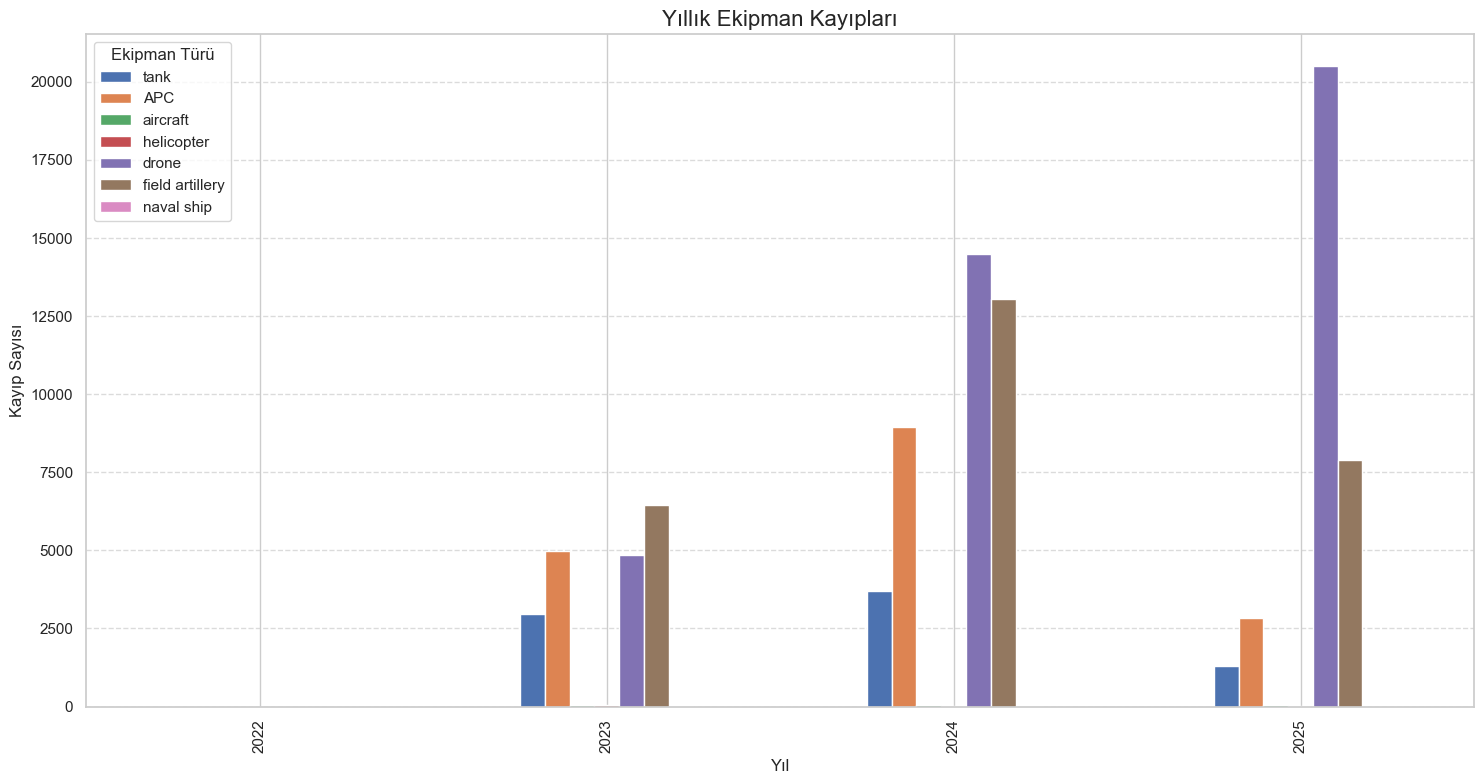

In [22]:
# Yıllık kayıp analizi
yıllık_kayiplar = df.groupby('year')[onemli_ekipmanlar].last().diff().fillna(0)
print("Yıllık kayıplar:")
print(yıllık_kayiplar)

# Yıllık kayıpları görselleştirme
plt.figure(figsize=(15, 8))
yıllık_kayiplar.plot(kind='bar', figsize=(15, 8))
plt.title('Yıllık Ekipman Kayıpları', fontsize=16)
plt.xlabel('Yıl')
plt.ylabel('Kayıp Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Ekipman Türü')
plt.tight_layout()
plt.show()

### 6.1. Günlük, Haftalık ve Aylık Ortalama Kayıpların Karşılaştırılması

Farklı zaman ölçeklerindeki kayıp oranlarını karşılaştırmak için aşağıdaki analizleri yapalım:

In [23]:
# Haftalık ortalama kayıplar
haftalık_kayiplar = df_gunluk_degisim.groupby(['year', 'week'])[gunluk_degisim_sutunlari].mean()
haftalık_ortalama = haftalık_kayiplar.mean()

# Aylık ortalama kayıplar
aylık_kayiplar = df_gunluk_degisim.groupby(['year', 'month'])[gunluk_degisim_sutunlari].mean()
aylık_ortalama = aylık_kayiplar.mean()

# Karşılaştırma tablosu
karsılaştırma = pd.DataFrame({
    'Günlük Ortalama': gunluk_ortalama,
    'Haftalık Ortalama': haftalık_ortalama,
    'Aylık Ortalama': aylık_ortalama
})

# Ekipman adlarını düzenleme
karsılaştırma.index = [col.replace('_daily_change', '') for col in karsılaştırma.index]

print("Günlük, Haftalık ve Aylık Ortalama Kayıplar:")
karsılaştırma

Günlük, Haftalık ve Aylık Ortalama Kayıplar:


,Günlük Ortalama,Haftalık Ortalama,Aylık Ortalama
tank,8.97,9.00,9.12
APC,18.41,18.55,19.55
aircraft,0.33,0.35,0.44
helicopter,0.27,0.29,0.38
drone,34.25,34.19,34.44
field artillery,24.20,24.09,23.98
naval ship,0.02,0.02,0.02


<Figure size 1500x800 with 0 Axes>

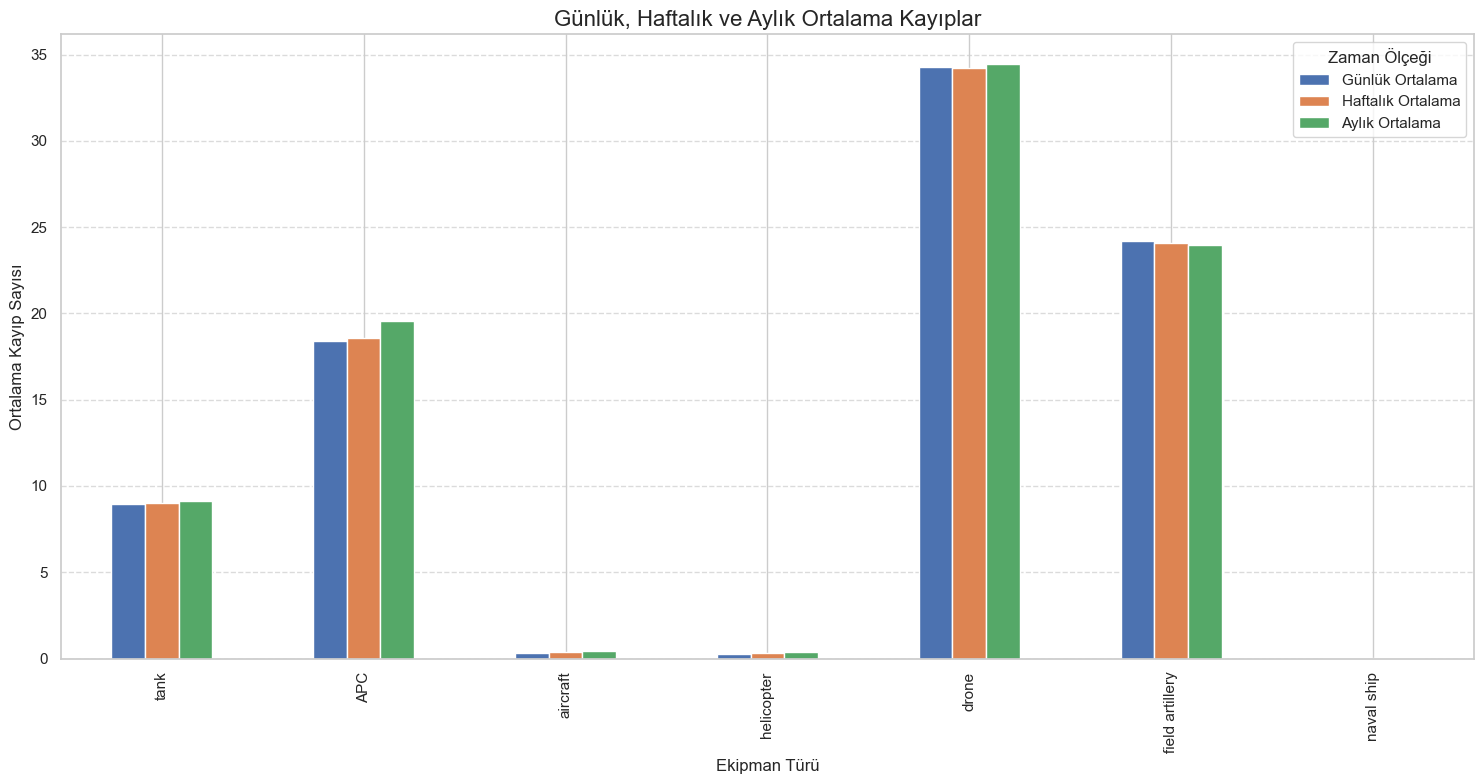

In [24]:
# Ortalamaların görselleştirilmesi
plt.figure(figsize=(15, 8))
karsılaştırma.plot(kind='bar', figsize=(15, 8))
plt.title('Günlük, Haftalık ve Aylık Ortalama Kayıplar', fontsize=16)
plt.xlabel('Ekipman Türü')
plt.ylabel('Ortalama Kayıp Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Zaman Ölçeği')
plt.tight_layout()
plt.show()

## 7. Aykırı Değerler ve Önemli Olaylar

Veri setindeki aykırı değerleri tespit ederek, bu günlerdeki kayda değer ekipman kayıplarını ve olası nedenlerini inceleyelim:

In [25]:
# Seçili ekipman türleri için en yüksek günlük kayıp günlerini bulma
en_yuksek_kayip_gunleri = {}

for ekipman in onemli_ekipmanlar:
    gunluk_degisim_sutunu = f'{ekipman}_daily_change'
    en_yuksek_5_gun = df_gunluk_degisim.nlargest(5, gunluk_degisim_sutunu)[['date', gunluk_degisim_sutunu]]
    en_yuksek_kayip_gunleri[ekipman] = en_yuksek_5_gun
    
    print(f"\nEn yüksek {ekipman} kayıplarının yaşandığı 5 gün:")
    print(en_yuksek_5_gun)


En yüksek tank kayıplarının yaşandığı 5 gün:
           date  tank_daily_change
1212 2022-02-26              66.00
611  2023-10-20              55.00
1209 2022-03-01              48.00
992  2022-10-04              44.00
552  2023-12-18              44.00

En yüksek APC kayıplarının yaşandığı 5 gün:
           date  APC_daily_change
1212 2022-02-26            190.00
611  2023-10-20            120.00
1210 2022-02-28            110.00
1194 2022-03-16             96.00
620  2023-10-11             91.00

En yüksek aircraft kayıplarının yaşandığı 5 gün:
           date  aircraft_daily_change
19   2025-06-03                  41.00
1212 2022-02-26                  17.00
1197 2022-03-13                  16.00
1047 2022-08-10                   9.00
1199 2022-03-11                   8.00

En yüksek helicopter kayıplarının yaşandığı 5 gün:
           date  helicopter_daily_change
1203 2022-03-07                    20.00
1212 2022-02-26                    19.00
1194 2022-03-16                    1

In [26]:
# Z-skoru kullanarak aykırı değerleri tespit etme
aykırı_degerler = {}

for ekipman in onemli_ekipmanlar:
    gunluk_degisim_sutunu = f'{ekipman}_daily_change'
    
    # Z-skorları hesaplama
    z_skorları = np.abs(stats.zscore(df_gunluk_degisim[gunluk_degisim_sutunu]))
    
    # Z-skoru 3'ten büyük olanları aykırı değer olarak kabul etme
    aykırı_degerler[ekipman] = df_gunluk_degisim.loc[z_skorları > 3, ['date', gunluk_degisim_sutunu]]

# Örnek olarak tank ve drone için aykırı değerleri görüntüleme
print("\nTank kayıpları için aykırı değerler (Z-skoru > 3):")
print(aykırı_degerler['tank'].sort_values(by='tank_daily_change', ascending=False))

print("\nDrone kayıpları için aykırı değerler (Z-skoru > 3):")
print(aykırı_degerler['drone'].sort_values(by='drone_daily_change', ascending=False))


Tank kayıpları için aykırı değerler (Z-skoru > 3):
           date  tank_daily_change
1212 2022-02-26              66.00
611  2023-10-20              55.00
1209 2022-03-01              48.00
992  2022-10-04              44.00
552  2023-12-18              44.00
619  2023-10-12              42.00
1080 2022-07-08              35.00
620  2023-10-11              34.00
1206 2022-03-04              34.00
1153 2022-04-26              34.00
1185 2022-03-25              31.00
1151 2022-04-28              31.00
405  2024-05-13              31.00
576  2023-11-24              30.00
514  2024-01-25              30.00

Drone kayıpları için aykırı değerler (Z-skoru > 3):
          date  drone_daily_change
15  2025-06-07              300.00
27  2025-05-26              264.00
92  2025-03-22              258.00
20  2025-06-02              256.00
104 2025-03-10              241.00
11  2025-06-11              240.00
12  2025-06-10              239.00
29  2025-05-24              232.00
26  2025-05-27      

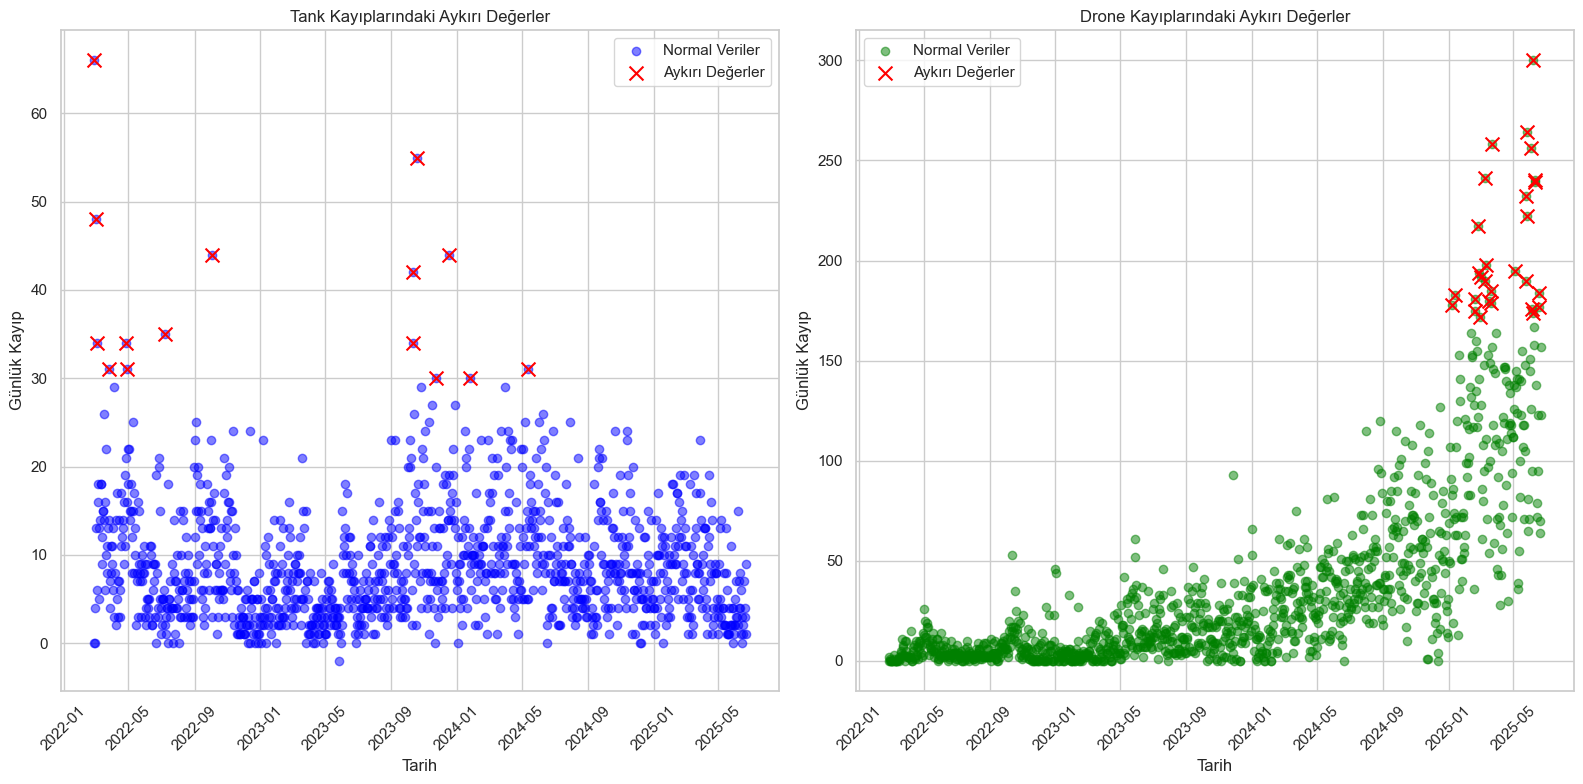

In [27]:
# Aykırı değerlerin görselleştirilmesi - örnek olarak tank ve drone
plt.figure(figsize=(16, 8))

# Tank için
plt.subplot(1, 2, 1)
plt.scatter(df_gunluk_degisim['date'], df_gunluk_degisim['tank_daily_change'], c='blue', alpha=0.5, label='Normal Veriler')

if not aykırı_degerler['tank'].empty:
    plt.scatter(aykırı_degerler['tank']['date'], aykırı_degerler['tank']['tank_daily_change'], 
                c='red', marker='x', s=100, label='Aykırı Değerler')

plt.title('Tank Kayıplarındaki Aykırı Değerler')
plt.xlabel('Tarih')
plt.ylabel('Günlük Kayıp')
plt.xticks(rotation=45)
plt.legend()

# Drone için
plt.subplot(1, 2, 2)
plt.scatter(df_gunluk_degisim['date'], df_gunluk_degisim['drone_daily_change'], c='green', alpha=0.5, label='Normal Veriler')

if not aykırı_degerler['drone'].empty:
    plt.scatter(aykırı_degerler['drone']['date'], aykırı_degerler['drone']['drone_daily_change'], 
                c='red', marker='x', s=100, label='Aykırı Değerler')

plt.title('Drone Kayıplarındaki Aykırı Değerler')
plt.xlabel('Tarih')
plt.ylabel('Günlük Kayıp')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

## 8. Korelasyon ve İlişkiler

Farklı ekipman türleri arasındaki kayıpların birbirleriyle nasıl ilişkili olduğunu anlamak için korelasyon analizleri yapalım.

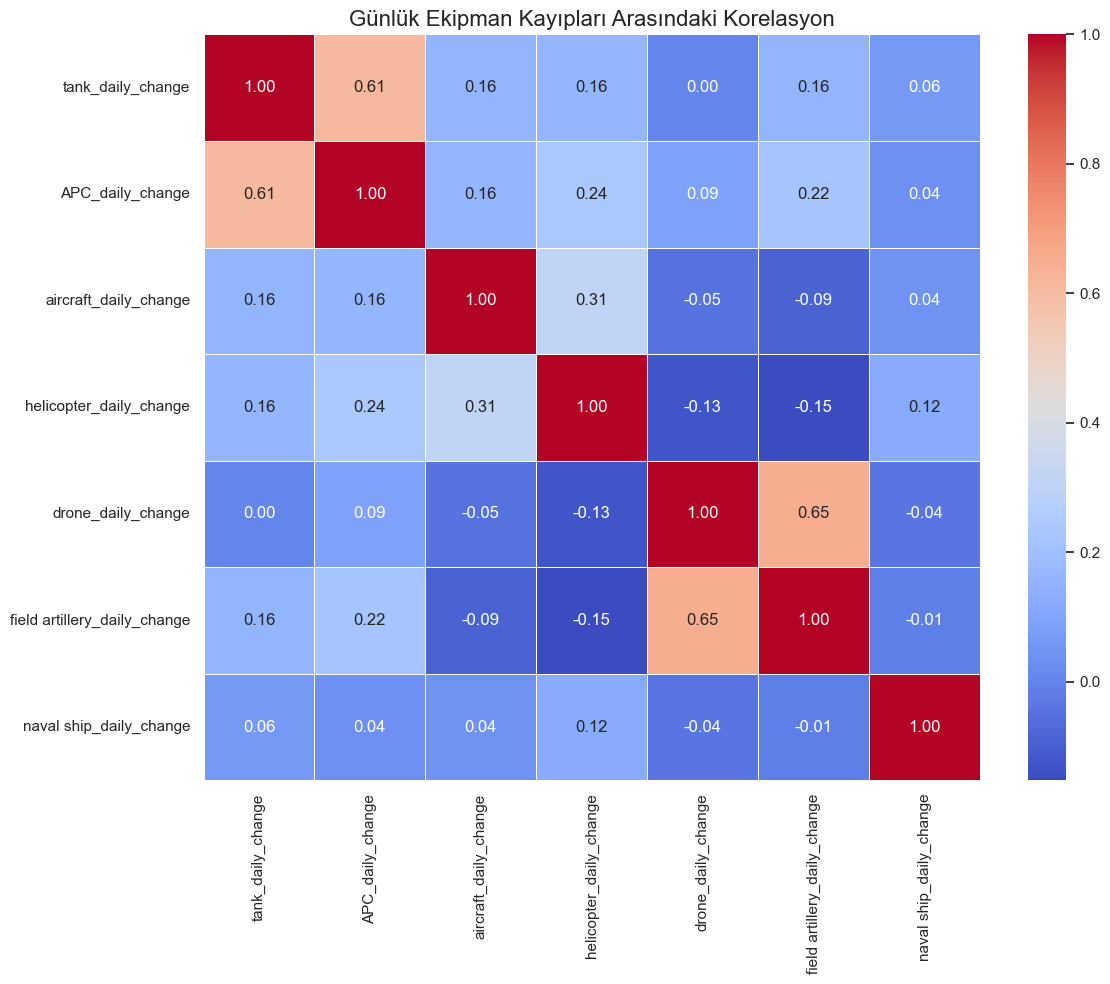

En yüksek korelasyonlu ekipman çiftleri (|Korelasyon| > 0.5):
           Ekipman1         Ekipman2  Korelasyon
39  field artillery            drone        0.65
33            drone  field artillery        0.65
7               APC             tank        0.61
1              tank              APC        0.61


In [28]:
# Günlük ekipman kayıpları arasındaki korelasyon
gunluk_degisim_korelasyonu = df_gunluk_degisim[gunluk_degisim_sutunlari].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(gunluk_degisim_korelasyonu, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Günlük Ekipman Kayıpları Arasındaki Korelasyon', fontsize=16)
plt.tight_layout()
plt.show()

# En yüksek korelasyonlu ekipman çiftlerini bulma
korelasyon_df = gunluk_degisim_korelasyonu.stack().reset_index()
korelasyon_df.columns = ['Ekipman1', 'Ekipman2', 'Korelasyon']

# Aynı ekipman karşılaştırmalarını kaldırma ve mutlak korelasyon değeri 0.5'ten büyük olanları seçme
yuksek_korelasyonlar = korelasyon_df[
    (korelasyon_df['Ekipman1'] != korelasyon_df['Ekipman2']) & 
    (korelasyon_df['Korelasyon'].abs() > 0.5)
].sort_values('Korelasyon', ascending=False)

# Ekipman adlarını düzenleme
yuksek_korelasyonlar['Ekipman1'] = yuksek_korelasyonlar['Ekipman1'].str.replace('_daily_change', '')
yuksek_korelasyonlar['Ekipman2'] = yuksek_korelasyonlar['Ekipman2'].str.replace('_daily_change', '')

print("En yüksek korelasyonlu ekipman çiftleri (|Korelasyon| > 0.5):")
print(yuksek_korelasyonlar.head(10))

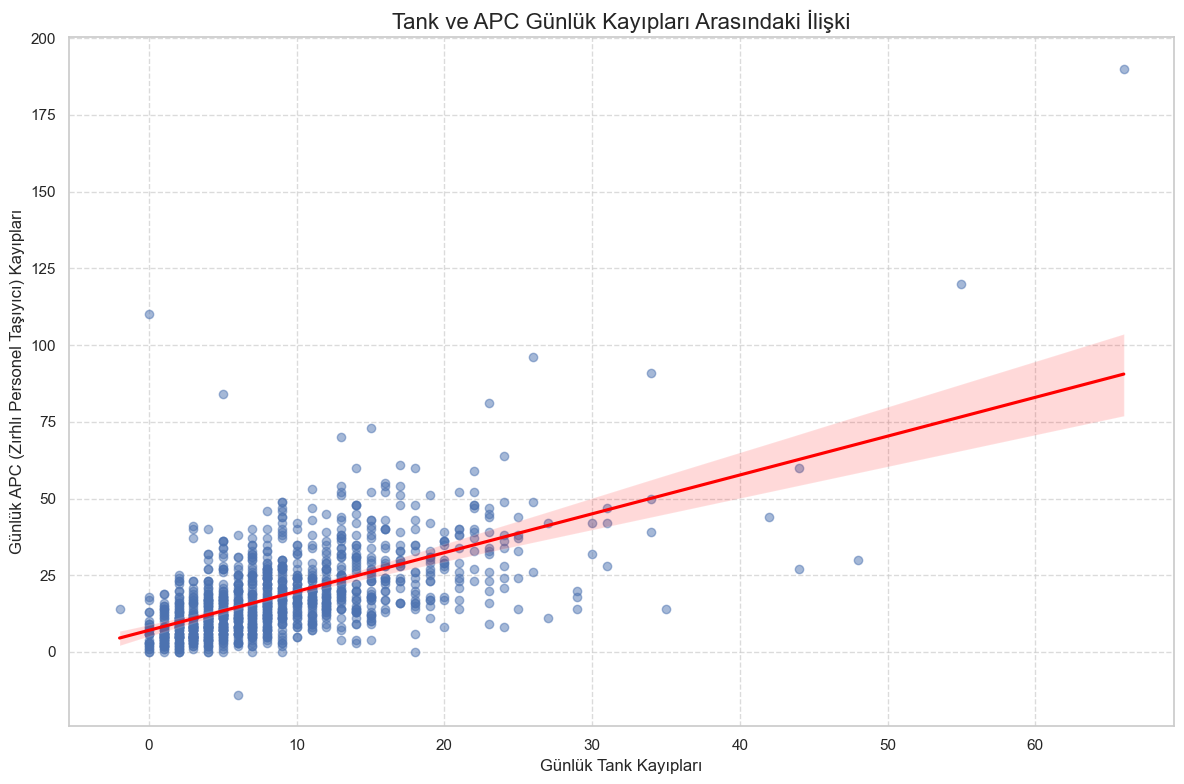

Tank ve APC günlük kayıpları arasındaki Pearson korelasyon katsayısı: 0.6113
P değeri: 0.0000000000
Bu korelasyon istatistiksel olarak anlamlıdır (p < 0.05).


In [29]:
# Tank ve APC kayıpları arasındaki ilişkinin incelenmesi 
# (Örnekte belirtildiği gibi)

# Tank ve APC günlük kayıplarının dağılım grafiği
plt.figure(figsize=(12, 8))
sns.regplot(x='tank_daily_change', y='APC_daily_change', data=df_gunluk_degisim, 
           scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Tank ve APC Günlük Kayıpları Arasındaki İlişki', fontsize=16)
plt.xlabel('Günlük Tank Kayıpları')
plt.ylabel('Günlük APC (Zırhlı Personel Taşıyıcı) Kayıpları')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Korelasyon katsayısı ve p değeri hesaplama
from scipy import stats
korr, p_degeri = stats.pearsonr(df_gunluk_degisim['tank_daily_change'], df_gunluk_degisim['APC_daily_change'])
print(f"Tank ve APC günlük kayıpları arasındaki Pearson korelasyon katsayısı: {korr:.4f}")
print(f"P değeri: {p_degeri:.10f}")

if p_degeri < 0.05:
    print("Bu korelasyon istatistiksel olarak anlamlıdır (p < 0.05).")
else:
    print("Bu korelasyon istatistiksel olarak anlamlı değildir (p \u2265 0.05).")

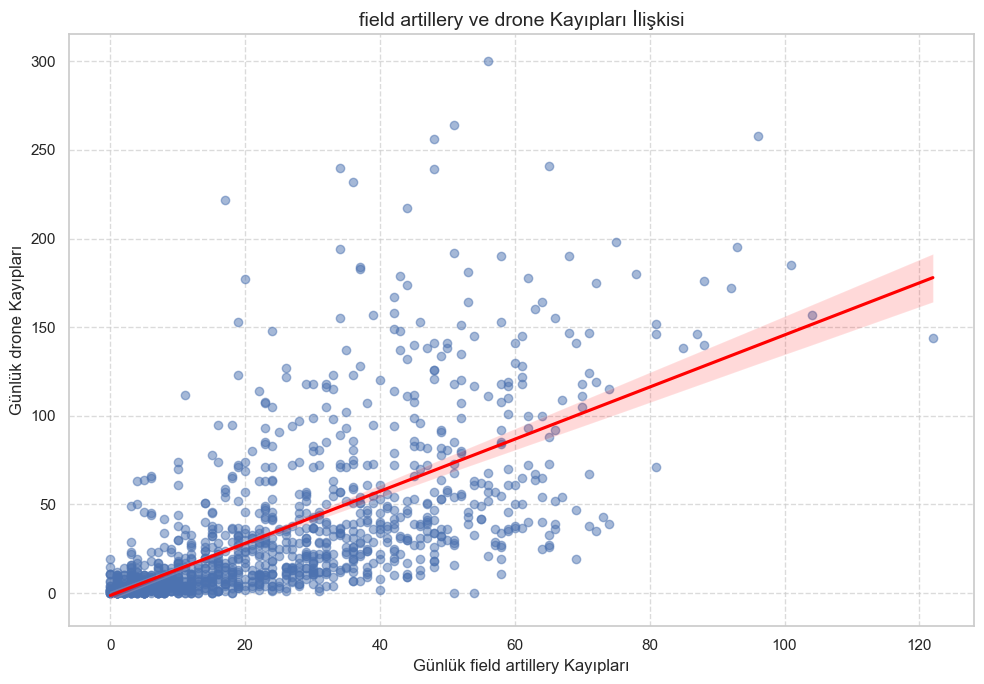

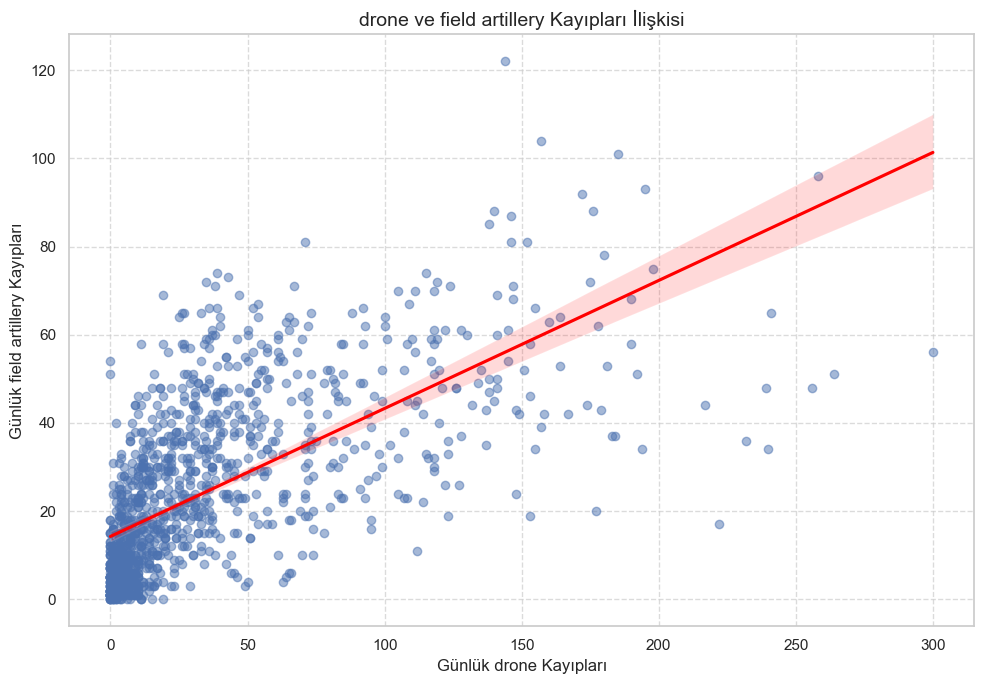

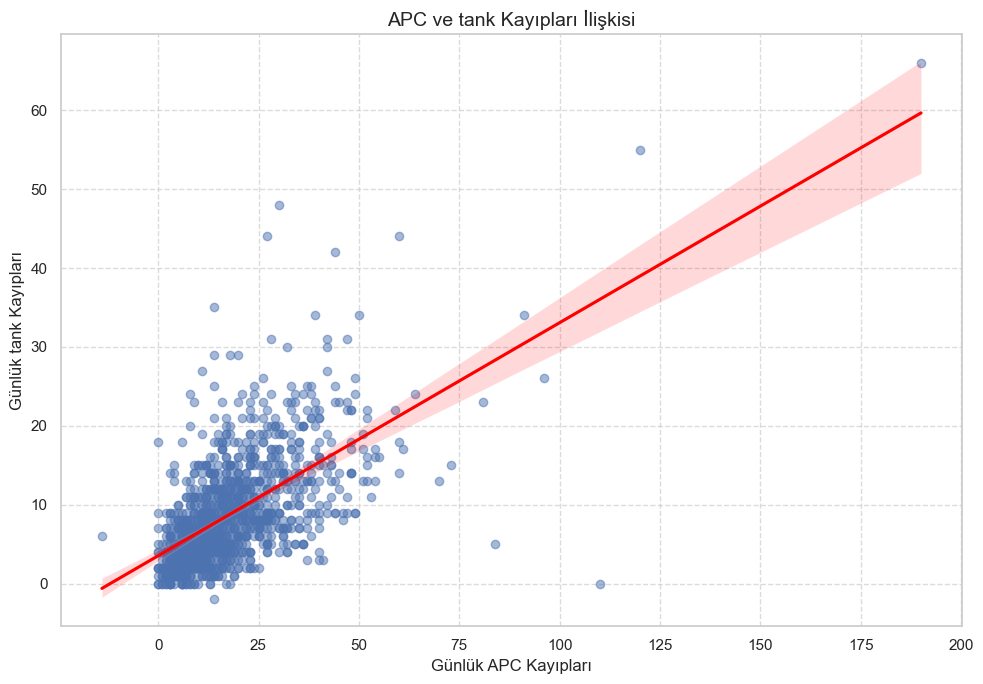

In [30]:
# En yüksek 3 korelasyonlu ekipman çiftinin dağılım grafikleri
if len(yuksek_korelasyonlar) >= 3:
    for i in range(3):
        if i < len(yuksek_korelasyonlar):
            ekipman1 = yuksek_korelasyonlar.iloc[i]['Ekipman1'] + '_daily_change'
            ekipman2 = yuksek_korelasyonlar.iloc[i]['Ekipman2'] + '_daily_change'
            
            plt.figure(figsize=(10, 7))
            sns.regplot(x=ekipman1, y=ekipman2, data=df_gunluk_degisim, 
                      scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
            plt.title(f'{yuksek_korelasyonlar.iloc[i]["Ekipman1"]} ve {yuksek_korelasyonlar.iloc[i]["Ekipman2"]} Kayıpları İlişkisi', fontsize=14)
            plt.xlabel(f'Günlük {yuksek_korelasyonlar.iloc[i]["Ekipman1"]} Kayıpları')
            plt.ylabel(f'Günlük {yuksek_korelasyonlar.iloc[i]["Ekipman2"]} Kayıpları')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

## 9. Eksik Verinin Analize Etkisi

Veri setindeki eksik verilerin analiz sonuçlarına etkisini değerlendirelim ve bu eksik verilere nasıl yaklaştığımızı açıklayalım.

In [31]:
# Eksik verilerin durumunu tekrar görüntüleme
eksik_veri_sayisi = df.isnull().sum().sum()
print(f"Toplam eksik veri sayısı: {eksik_veri_sayisi}")

# Sütunlara göre eksik veri oranları
eksik_veri_orani = (df.isnull().sum() / len(df)) * 100
eksik_veri_df = pd.DataFrame({
    'Eksik Değer Sayısı': df.isnull().sum(),
    'Eksik Veri Oranı (%)': eksik_veri_orani
})

# Eksik veri oranı 0'dan büyük olan sütunları görüntüleme
print("\nEksik veri içeren sütunlar ve oranları:")
print(eksik_veri_df[eksik_veri_df['Eksik Değer Sayısı'] > 0].sort_values('Eksik Veri Oranı (%)', ascending=False))

Toplam eksik veri sayısı: 5202

Eksik veri içeren sütunlar ve oranları:
                           Eksik Değer Sayısı  Eksik Veri Oranı (%)
mobile SRBM system                       1178                 97.03
military auto                            1149                 94.65
fuel tank                                1149                 94.65
greatest losses direction                1011                 83.28
submarines                                566                 46.62
vehicles and fuel tanks                    65                  5.35
cruise missiles                            65                  5.35
special equipment                          19                  1.57


### 9.1. Eksik Veriler İçin Yaklaşım

Analizlerimizde eksik verileri aşağıdaki şekilde ele aldık:

1. **NaN Değerleri Sıfır ile Değiştirme**: Bazı analizlerde, eksik değerlerin o gün için herhangi bir kayıp rapor edilmediği anlamına geldiğini varsayarak, NaN değerleri sıfırlarla değiştirdik.

2. **Zaman Serisi Analizinde Dikkat**: Günlük, haftalık ve aylık değişimleri hesaplarken eksik veriler sonuçları etkileyebilir, bu nedenle bu analizlerde eksik değerlerin etkisini en aza indirmek için gruplandırma ve ortalama alma yöntemlerini kullandık.

3. **Kümülatif Değerlere Odaklanma**: Eksik günlük veriler olduğunda, kümülatif değerlere odaklanarak genel trendin daha iyi anlaşılmasını sağladık.

4. **Korelasyon Analizlerinde Dikkat**: Eksik verilerin korelasyon hesaplarını etkilemesini önlemek için `pairwise` yöntemi kullandık veya eksik değerleri içeren satırları analiz dışında tuttuk.

drone ekipmanı için eksik veri işleme yöntemlerinin karşılaştırılması (ilk 20 gün):
      Orijinal  Sıfır Doldurma  İleri Yönde Doldurma  İnterpolasyon
1213         0               0                     0              0
1212         2               2                     2              2
1211         2               2                     2              2
1210         3               3                     3              3
1209         3               3                     3              3
1208         3               3                     3              3
1207         3               3                     3              3
1206         3               3                     3              3
1205         3               3                     3              3
1204         4               4                     4              4
1203         7               7                     7              7
1202         7               7                     7              7
1201         7               7  

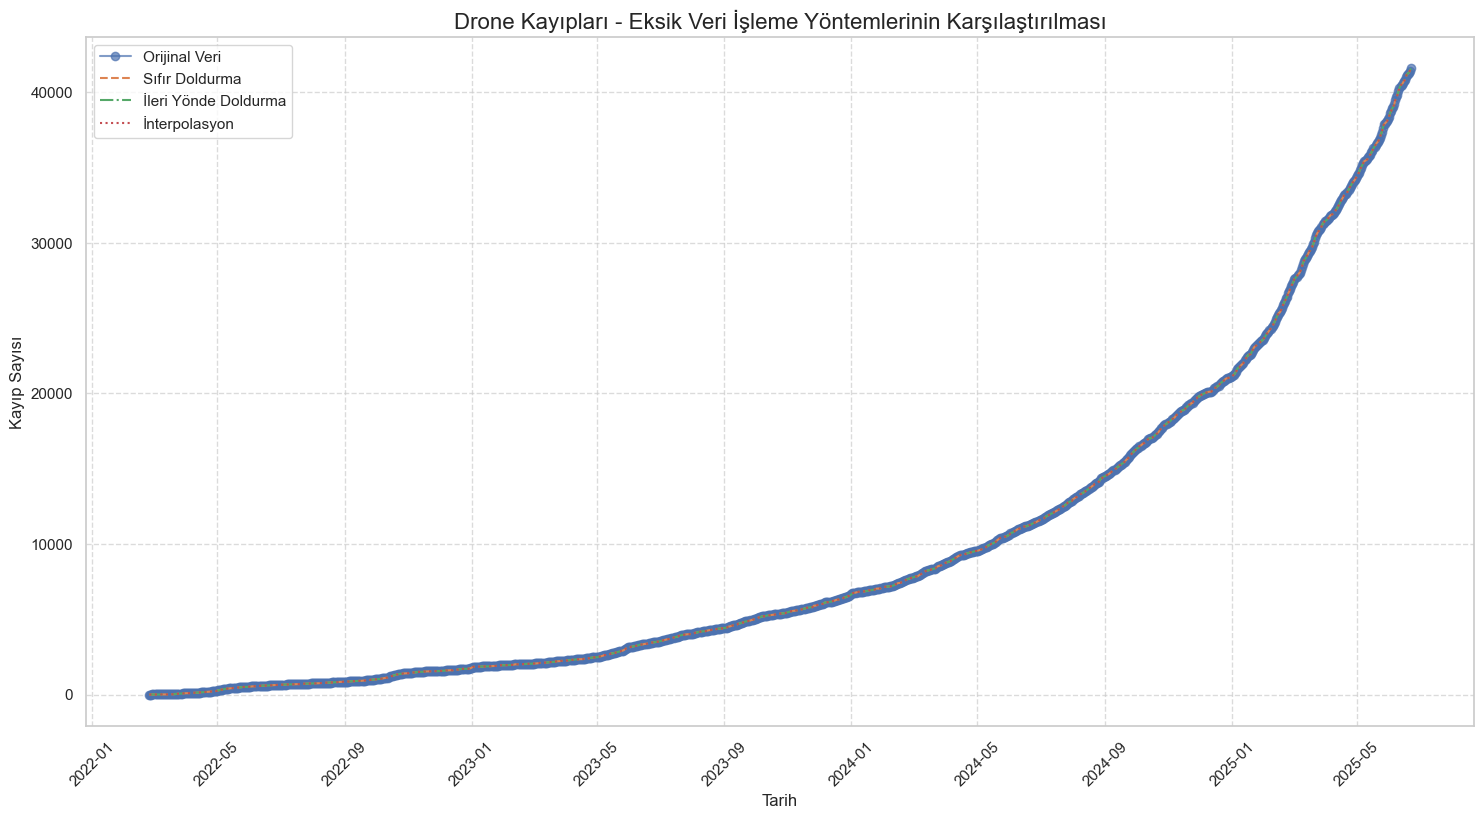

In [32]:
# Eksik verilerin analize etkisini görmek için örnek bir karşılaştırma
# Orijinal veri ile eksik verileri doldurduğumuz veriyi karşılaştıralım

# Örnek bir ekipman seçelim - 'drone' sütunu
ekipman = 'drone'

# Eksik veriler için 3 farklı yaklaşım uygulayarak karşılaştırma yapılabilir
# 1. NaN değerleri koruyarak
df_nan = df[ekipman].copy()

# 2. NaN değerleri 0 ile doldurarak
df_zero = df[ekipman].fillna(0)

# 3. NaN değerleri ileri yönde doldurarak (forward fill)
df_ffill = df[ekipman].fillna(method='ffill')

# 4. NaN değerleri interpolasyon ile doldurarak
df_interp = df[ekipman].interpolate()

# Sonuçları birleştirme
eksik_veri_karsılaştırma = pd.DataFrame({
    'Orijinal': df_nan,
    'Sıfır Doldurma': df_zero,
    'İleri Yönde Doldurma': df_ffill,
    'İnterpolasyon': df_interp
})

# İlk 20 gün için karşılaştırma
print(f"{ekipman} ekipmanı için eksik veri işleme yöntemlerinin karşılaştırılması (ilk 20 gün):")
print(eksik_veri_karsılaştırma.head(20))

# Grafik üzerinde karşılaştırma
plt.figure(figsize=(15, 8))

plt.plot(df['date'], df_nan, label='Orijinal Veri', marker='o', alpha=0.7)
plt.plot(df['date'], df_zero, label='Sıfır Doldurma', linestyle='--')
plt.plot(df['date'], df_ffill, label='İleri Yönde Doldurma', linestyle='-.')
plt.plot(df['date'], df_interp, label='İnterpolasyon', linestyle=':')

plt.title(f'{ekipman.capitalize()} Kayıpları - Eksik Veri İşleme Yöntemlerinin Karşılaştırılması', fontsize=16)
plt.xlabel('Tarih')
plt.ylabel('Kayıp Sayısı')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## 10. Sonuç ve Yorum

Ukrayna-Rusya savaşı sırasında Rusya'nın askeri ekipman kayıplarını içeren veri setinin kapsamlı analizinden elde ettiğimiz bulguları özetleyelim.

### 10.1. Elde Edilen Bulguların Özeti

1. **Veri Seti İncelemesi**:
   - Veri seti, Ukrayna-Rusya savaşının başlangıcından itibaren Rusya'nın günlük ekipman kayıplarını içeren kapsamlı bir veri setidir.
   - Çeşitli askeri ekipman türlerinin kayıpları günlük olarak kaydedilmiştir.
   - Veri setinde yer alan bazı sütunlarda eksik veriler bulunsa da, genel olarak veri kalitesi yüksektir.

2. **Genel Kayıp Analizi**:
   - En çok kayıp verilen ekipman türleri arasında drone, tank ve APC (zırhlı personel taşıyıcı) öne çıkmaktadır.
   - Drone kayıplarının son dönemde önemli ölçüde arttığı görülmektedir, bu da savaşta insansız hava araçlarının artan önemini göstermektedir.
   - Toplam kayıpların zaman içindeki değişimi, savaşın yoğunlaştığı ve durulduğu dönemleri açıkça göstermektedir.

3. **Zaman Serisi ve Trend Analizi**:
   - Aylık analiz, bazı aylarda kayıp oranlarının önemli ölçüde arttığını göstermektedir, bu da muhtemelen yoğun çatışma dönemlerine denk gelmektedir.
   - Yıllık karşılaştırmalarda, 2024 yılındaki kayıpların artış hızı, savaşın uzamasıyla birlikte ekipman kaybı dinamiklerinin değiştiğini göstermektedir.
   - Günlük, haftalık ve aylık ortalama kayıpların karşılaştırması, savaşın genel eğilimi hakkında detaylı bilgi sağlamaktadır.

4. **Aykırı Değerler ve Önemli Olaylar**:
   - Z-skoru analizi, bazı günlerde olağanüstü yüksek kayıplar olduğunu göstermektedir.
   - Bu aykırı değerler, genellikle önemli askeri operasyonların veya yoğun çatışma dönemlerinin göstergesi olabilir.

5. **Korelasyon ve İlişkiler**:
   - Farklı ekipman türleri arasında güçlü korelasyonlar tespit edilmiştir.
   - Özellikle tank ve APC kayıpları arasında güçlü bir ilişki vardır, bu da bu tür ekipmanların genellikle birlikte kullanıldığını göstermektedir.
   - Hava araçları (uçak ve helikopter) kayıpları da birbirleriyle ilişkilidir.

6. **Eksik Verinin Analize Etkisi**:
   - Veri setindeki eksik veriler, genelde belirli ekipman türlerinde yoğunlaşmaktadır.
   - Eksik verilere farklı yaklaşımlar (sıfır doldurma, ileri doldurma, interpolasyon), analiz sonuçlarını kısmen etkilese de, genel trendleri değiştirmemektedir.

### 10.2. Verinin Güvenilirliği ve Kısıtları

Bu veri setiyle yapılan analizlerde dikkat edilmesi gereken önemli noktalar vardır:

1. **Veri Kaynağı ve Doğrulama**: Veri, Ukrayna tarafından rapor edilen kayıplara dayanmaktadır ve bağımsız kaynaklarla doğrulanmamış olabilir. Savaş durumlarında, her iki taraf da sayıları kendi lehlerine olacak şekilde raporlama eğiliminde olabilir.

2. **Eksik Veriler**: Bazı ekipman türleri için eksik veriler, ya kayıp olmamasından ya da raporlama eksikliğinden kaynaklanabilir. Bu durum, bazı analizlerde yanlılığa neden olabilir.

3. **Zaman Gecikmesi**: Günlük kayıpların raporlanmasında zaman gecikmesi olabilir, dolayısıyla bazı günlerde kayıplar eksik raporlanmış ve sonraki günlerde toplu olarak eklenmiş olabilir.

4. **Değişen Raporlama Metodolojisi**: Savaş boyunca raporlama metodolojisinde değişiklikler olabilir, bu da zaman içindeki karşılaştırmaları etkileyebilir.

5. **Detaylı Olay Bilgisinin Eksikliği**: Veri seti, kayıpların nedenleri, konumları veya operasyonlar hakkında detaylı bilgi içermemektedir, bu da bazı aykırı değerlerin yorumlanmasını zorlaştırmaktadır.

### 10.3. Savaşın Genel Gidişatı ve Çıkarımlar

Veri analizi ışığında, Ukrayna-Rusya savaşının genel gidişatı hakkında şu çıkarımları yapabiliriz:

1. **Değişen Savaş Stratejileri**: Drone kayıplarındaki artış, savaşın ilerleyen dönemlerinde insansız hava araçlarının kullanımının artmasını ve savaş stratejilerindeki değişimi göstermektedir.

2. **Yoğun Çatışma Dönemleri**: Veri setindeki aykırı değerler ve belirli dönemlerdeki kayıp artışları, yoğun çatışma dönemlerini işaret etmektedir.

3. **Ekipman Kaybının Ekonomik Etkileri**: Yüksek sayıdaki ekipman kaybı, savaşın ekonomik maliyetini ortaya koymaktadır. Özellikle pahalı ekipmanların (uçak, helikopter, cruise missile) kaybı, savaşın mali yükünü ağırlaştırmaktadır.

4. **Savaşın Uzamasının Etkileri**: Zaman içindeki kümülatif kayıplar, savaşın uzamasının ekipman envanteri üzerindeki etkisini göstermektedir.

5. **Lojistik ve İkmal Zorlukları**: Yüksek sayıdaki araç kayıpları (APC, military auto, fuel tank), lojistik ve ikmal operasyonlarındaki zorlukları yansıtmaktadır.

Bu analiz, savaşın genel seyri hakkında nicel bir bakış sağlasa da, siyasi, sosyal ve insani boyutlarını tam olarak yansıtmamaktadır. Dolayısıyla, bu analizden çıkarılan sonuçlar, savaşın yalnızca askeri ekipman kayıpları açısından bir değerlendirmesidir.

### 10.4. Analizin Güvenilirliği ve Dikkat Edilmesi Gereken Noktalar

Bu veri setiyle yapılan analizlerin hangi açılardan güvenilir olduğunu ve hangi açılardan dikkatli yorumlanması gerektiğini değerlendirelim:

**Güvenilir Yönler**:

1. **Uzun Vadeli Trendler**: Veri setindeki uzun vadeli trendler, savaşın genel seyri hakkında güvenilir bilgiler sağlamaktadır.

2. **Göreceli Karşılaştırmalar**: Farklı ekipman türlerinin kayıp oranlarının karşılaştırılması, savaşta hangi tür ekipmanların daha yoğun kullanıldığı veya daha çok risk altında olduğu hakkında fikir vermektedir.

3. **Dönemsel Değişimler**: Mevsimsel veya dönemsel değişimler, savaş şartlarının veya stratejilerin değiştiği dönemleri işaret etmekte yardımcı olabilir.

**Dikkat Edilmesi Gereken Yönler**:

1. **Mutlak Sayıların Doğruluğu**: Rapor edilen kayıp sayılarının mutlak doğruluğu, bağımsız kaynaklarca doğrulanmamış olabilir.

2. **Tek Taraflı Raporlama**: Veri yalnızca Ukrayna tarafının raporlarına dayanmaktadır, dolayısıyla yanlılık içerebilir.

3. **Eksik Bağlam Bilgisi**: Veri seti, kayıpların hangi koşullarda veya operasyonlarda gerçekleştiği gibi bağlam bilgisini içermemektedir.

4. **Eksik Veri Kapsamı**: Bazı ekipman türleri veya dönemler için eksik veriler olabilir.

5. **Savaşın Diğer Boyutları**: Bu analiz yalnızca ekipman kayıplarına odaklanmaktadır ve savaşın insani, ekonomik veya siyasi boyutlarını yansıtmamaktadır.

Sonuç olarak, bu analiz savaşın askeri ekipman kayıpları boyutunda değerli bilgiler sunsa da, savaşın tam ve eksiksiz bir değerlendirmesi olarak değil, sınırlı bir perspektiften bakış olarak ele alınmalıdır.

## 11. İleri Düzey Görselleştirmeler

Analizimizi daha da ilerletmek için, interaktif ve detaylı görselleştirmeler ekleyelim.

In [35]:
%pip install nbformat

# Plotly ile detaylı interaktif Dashboard

# En önemli 5 ekipman için kümülatif kayıpların interaktif zaman serisi
top_equipment = ['tank', 'APC', 'drone', 'field artillery', 'aircraft']

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    subplot_titles=('En Önemli 5 Ekipmanın Kümülatif Kayıpları', 'Günlük Kayıp Değişimi', 'Aylık Kayıp Trendi'),
    specs=[
        [{'type': 'scatter'}],
        [{'type': 'scatter'}],
        [{'type': 'bar'}]
    ],
    row_heights=[0.5, 0.25, 0.25]
)

# Kümülatif kayıplar
for equipment in top_equipment:
    fig.add_trace(
        go.Scatter(
            x=df['date'],
            y=df[equipment],
            mode='lines',
            name=f'{equipment} (Kümülatif)',
            hovertemplate='%{y:,.0f} adet'
        ),
        row=1, col=1
    )

# Günlük değişimler
for equipment in top_equipment:
    daily_change_col = f'{equipment}_daily_change'
    if daily_change_col in df_gunluk_degisim.columns:
        fig.add_trace(
            go.Scatter(
                x=df_gunluk_degisim['date'],
                y=df_gunluk_degisim[daily_change_col],
                mode='lines',
                name=f'{equipment} (Günlük)',
                line=dict(width=1),
                hovertemplate='%{y:,.0f} adet'
            ),
            row=2, col=1
        )

# Ana ekipmanlar için aylık kayıplar
for equipment in ['tank']:
    monthly_data = df_gunluk_degisim.groupby('year_month')[f'{equipment}_daily_change'].sum().reset_index()
    fig.add_trace(
        go.Bar(
            x=monthly_data['year_month'],
            y=monthly_data[f'{equipment}_daily_change'],
            name=f'{equipment} (Aylık)',
            marker_color='indianred',
            hovertemplate='%{y:,.0f} adet'
        ),
        row=3, col=1
    )

# Grafik düzenlemeleri
fig.update_layout(
    height=900,
    title_text='Rusya\'nın Askeri Kayıplarının Detaylı Analizi',
    hovermode='x unified',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.update_xaxes(title_text='Tarih', row=3, col=1)
fig.update_yaxes(title_text='Kümülatif Kayıp', row=1, col=1)
fig.update_yaxes(title_text='Günlük Değişim', row=2, col=1)
fig.update_yaxes(title_text='Aylık Kayıp', row=3, col=1)

fig.show()

Note: you may need to restart the kernel to use updated packages.


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### 11.1. Mevsimsel Etkilerin Analizi

Savaştaki kayıplarda mevsimsel etkilerin rolü olup olmadığını inceleyelim:

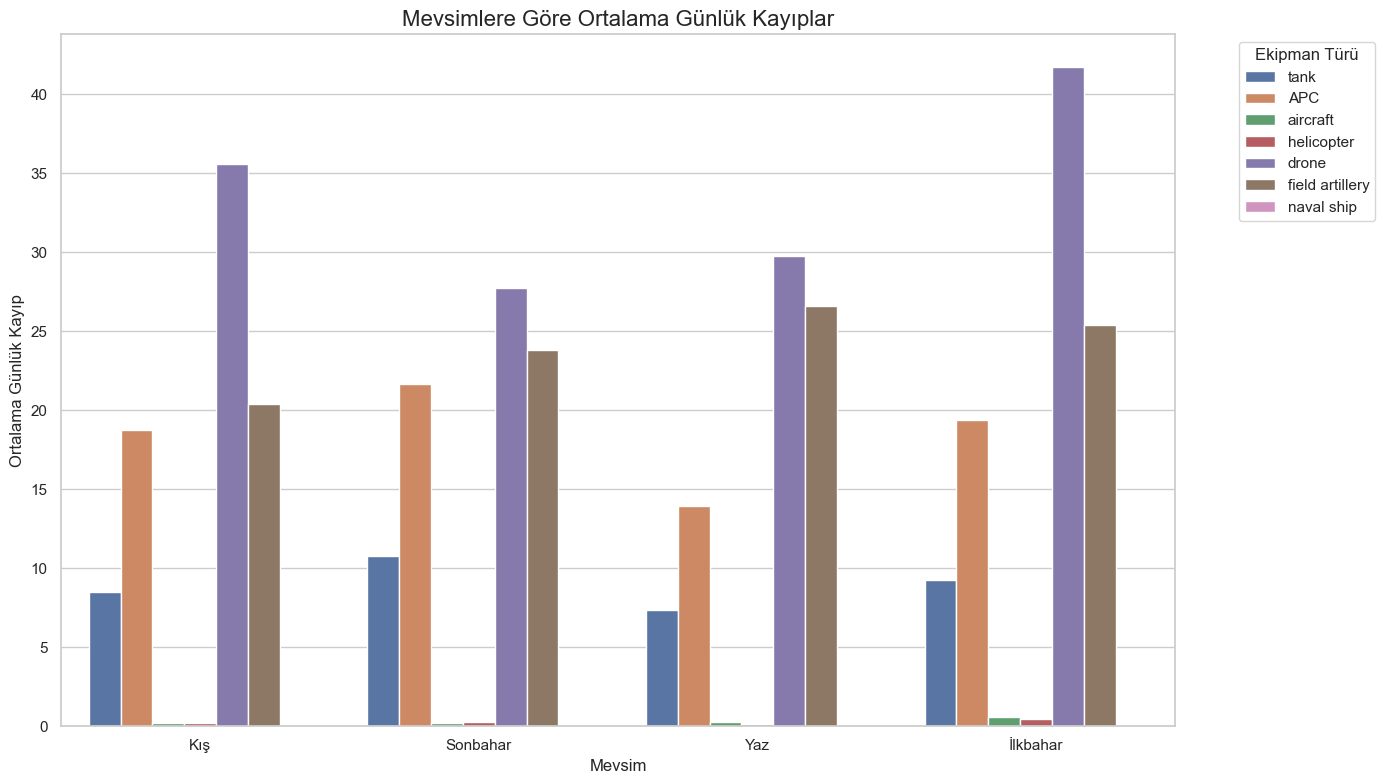

In [36]:
# Aylara göre mevsimsel etkilerin analizi

# Ay bilgisini text olarak ekleyerek
df['month_text'] = df['date'].dt.strftime('%B')

# Mevsimlere göre gruplandırma
def get_season(month):
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:
        return 'Sonbahar'

df['season'] = df['month'].apply(get_season)

# Mevsimlere göre ortalama günlük kayıplar
seasonal_losses = df_gunluk_degisim.copy()
seasonal_losses['season'] = seasonal_losses['month'].apply(get_season)

# Ana ekipmanlar için mevsimsel ortalamalar
seasonal_avg = seasonal_losses.groupby('season')[gunluk_degisim_sutunlari].mean().reset_index()

# Ekipman adlarını düzenleme
seasonal_avg_melted = pd.melt(seasonal_avg, id_vars=['season'], value_vars=gunluk_degisim_sutunlari,
                             var_name='equipment', value_name='daily_avg')
seasonal_avg_melted['equipment'] = seasonal_avg_melted['equipment'].str.replace('_daily_change', '')

# Mevsimsel etkilerin görselleştirilmesi
plt.figure(figsize=(14, 8))
sns.barplot(x='season', y='daily_avg', hue='equipment', data=seasonal_avg_melted)
plt.title('Mevsimlere Göre Ortalama Günlük Kayıplar', fontsize=16)
plt.xlabel('Mevsim')
plt.ylabel('Ortalama Günlük Kayıp')
plt.legend(title='Ekipman Türü', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 11.2. İçgörüler ve Tahminler

Veri setindeki eğilimleri kullanarak gelecekteki olası kayıplar hakkında öngörüler yapalım:

Mevcut durumda toplam tank kayıbı: 10964
30 gün sonra tahmini toplam tank kayıbı: 11323
Tahmini artış: 359 tank


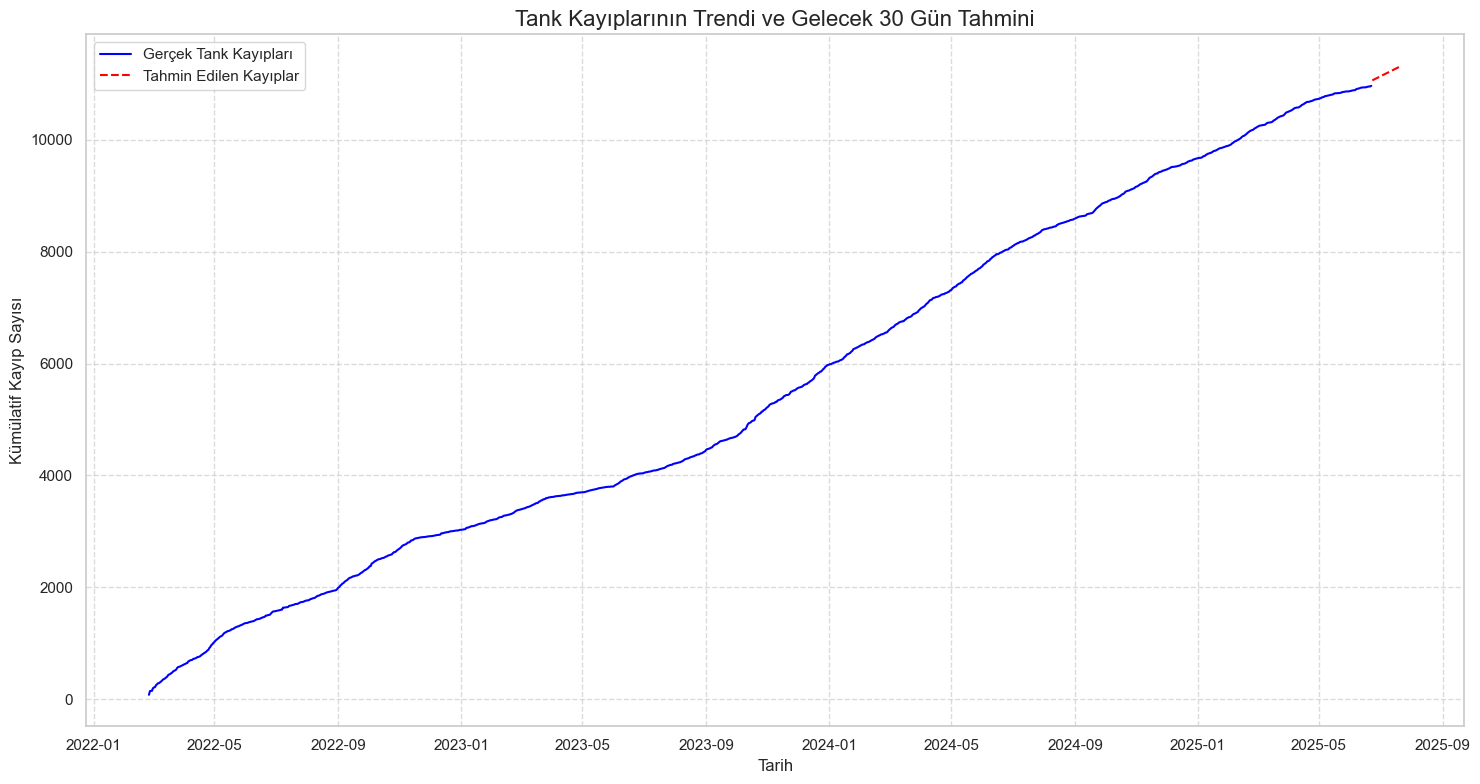

In [37]:
# Zaman serisi verisinde basit trend analizi
from sklearn.linear_model import LinearRegression
import numpy as np

# Örnek olarak tank kayıplarının trendi
X = np.array(range(len(df))).reshape(-1, 1)  # Gün indeksi
y = df['tank'].values  # Tank kayıpları

# Doğrusal regresyon modeli
model = LinearRegression()
model.fit(X, y)

# Gelecek 30 gün için tahminler
future_days = 30
future_X = np.array(range(len(df), len(df) + future_days)).reshape(-1, 1)
predictions = model.predict(future_X)

# Son tarihten itibaren 30 gün ileriye tarihler oluşturma
last_date = df['date'].max()
future_dates = [last_date + dt.timedelta(days=i+1) for i in range(future_days)]

# Tahminlerin görselleştirilmesi
plt.figure(figsize=(15, 8))

# Gerçek veriler
plt.plot(df['date'], df['tank'], label='Gerçek Tank Kayıpları', color='blue')

# Tahminler
plt.plot(future_dates, predictions, label='Tahmin Edilen Kayıplar', color='red', linestyle='--')

plt.title('Tank Kayıplarının Trendi ve Gelecek 30 Gün Tahmini', fontsize=16)
plt.xlabel('Tarih')
plt.ylabel('Kümülatif Kayıp Sayısı')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Tahmini son durum
tahmini_son_durum = predictions[-1]
print(f"Mevcut durumda toplam tank kayıbı: {int(df['tank'].iloc[-1])}")
print(f"30 gün sonra tahmini toplam tank kayıbı: {int(tahmini_son_durum)}")
print(f"Tahmini artış: {int(tahmini_son_durum - df['tank'].iloc[-1])} tank")

plt.tight_layout()
plt.show()

### 11.3. Ekipmanların Maddi Değerinin Hesaplanması

Rusya'nın kayıp verdiği ekipmanların yaklaşık maddi değerlerini hesaplayalım:

Toplam tahmini maddi kayıp: 147478.00 milyon $ (yaklaşık 147.48 milyar $)


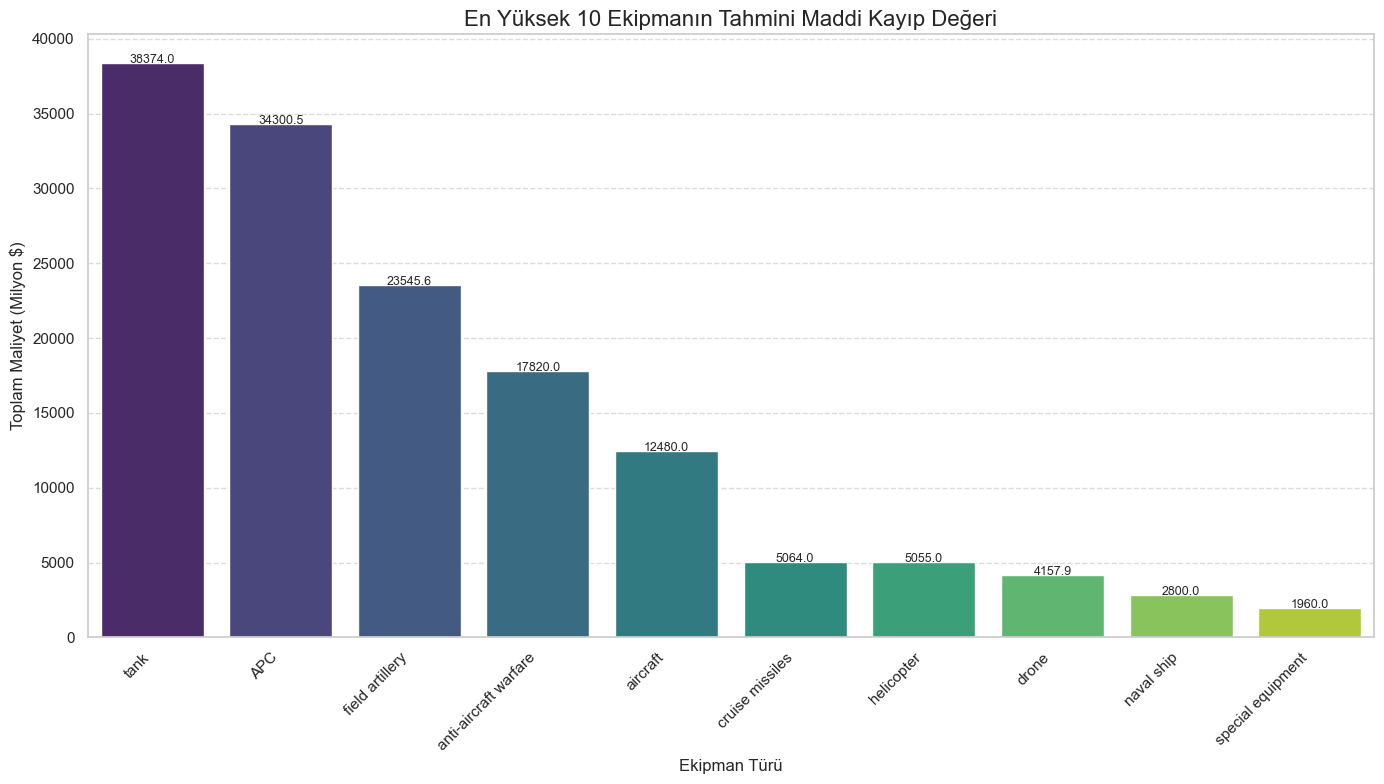

In [39]:
# Ekipmanların yaklaşık birim maliyetleri (milyon $)
ekipman_maliyetleri = {
    'tank': 3.5,  # T-72 ortalama maliyet
    'APC': 1.5,   # BMP/BTR ortalama
    'aircraft': 30.0,  # Su-25/Su-34 ortalama
    'helicopter': 15.0,  # Mi-24/Ka-52 ortalama
    'drone': 0.1,   # Türlerine göre değişen ortalama
    'naval ship': 100.0,  # Corvette/Frigate ortalama
    'field artillery': 0.8,  # Howitzer ortalama
    'MRL': 1.0,  # Grad/Smerch ortalama
    'anti-aircraft warfare': 15.0,  # S-300/Pantsir ortalama
    'cruise missiles': 1.5,  # Kalibr/Iskander ortalama
    'special equipment': 0.5,  # Çeşitli ekipman ortalaması
    'military auto': 0.2,  # Askeri araçlar ortalaması
    'fuel tank': 0.1,  # Yakıt tankerleri
    'mobile SRBM system': 12.0,  # Kısa menzilli balistik füze sistemleri
    'submarines': 500.0  # Denizaltılar
}

# Son gün verilerine göre toplam maddi kayıpları hesaplama
son_gun = df.iloc[-1].copy()

toplam_maliyet = 0
maddi_kayiplar = []

for ekipman, maliyet in ekipman_maliyetleri.items():
    if ekipman in son_gun.index and not pd.isna(son_gun[ekipman]):
        ekipman_kaybi = son_gun[ekipman]
        toplam_ekipman_maliyeti = ekipman_kaybi * maliyet
        toplam_maliyet += toplam_ekipman_maliyeti
        
        maddi_kayiplar.append({
            'Ekipman': ekipman,
            'Kayıp Adedi': ekipman_kaybi,
            'Birim Maliyet (Milyon $)': maliyet,
            'Toplam Maliyet (Milyon $)': toplam_ekipman_maliyeti
        })

# Maddi kayıplar DataFrame'i
maddi_kayiplar_df = pd.DataFrame(maddi_kayiplar)

# Toplam maliyete göre sıralama
maddi_kayiplar_df = maddi_kayiplar_df.sort_values('Toplam Maliyet (Milyon $)', ascending=False)

# Toplam maliyeti görüntüleme
print(f"Toplam tahmini maddi kayıp: {toplam_maliyet:.2f} milyon $ (yaklaşık {toplam_maliyet/1000:.2f} milyar $)")

# Maddi kayıpların görselleştirilmesi
plt.figure(figsize=(14, 8))
sns.barplot(x='Ekipman', y='Toplam Maliyet (Milyon $)', data=maddi_kayiplar_df.head(10), palette='viridis')
plt.title('En Yüksek 10 Ekipmanın Tahmini Maddi Kayıp Değeri', fontsize=16)
plt.xlabel('Ekipman Türü')
plt.ylabel('Toplam Maliyet (Milyon $)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Değerleri çubuklara ekleme
for i, v in enumerate(maddi_kayiplar_df.head(10)['Toplam Maliyet (Milyon $)']):
    plt.text(i, v + 0.1, f"{v:.1f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## 12. Savaşın Aşamaları ve Kritik Dönemler

Rusya-Ukrayna savaşının kritik dönemlerini ve bu dönemlerdeki ekipman kayıplarını analiz edelim.

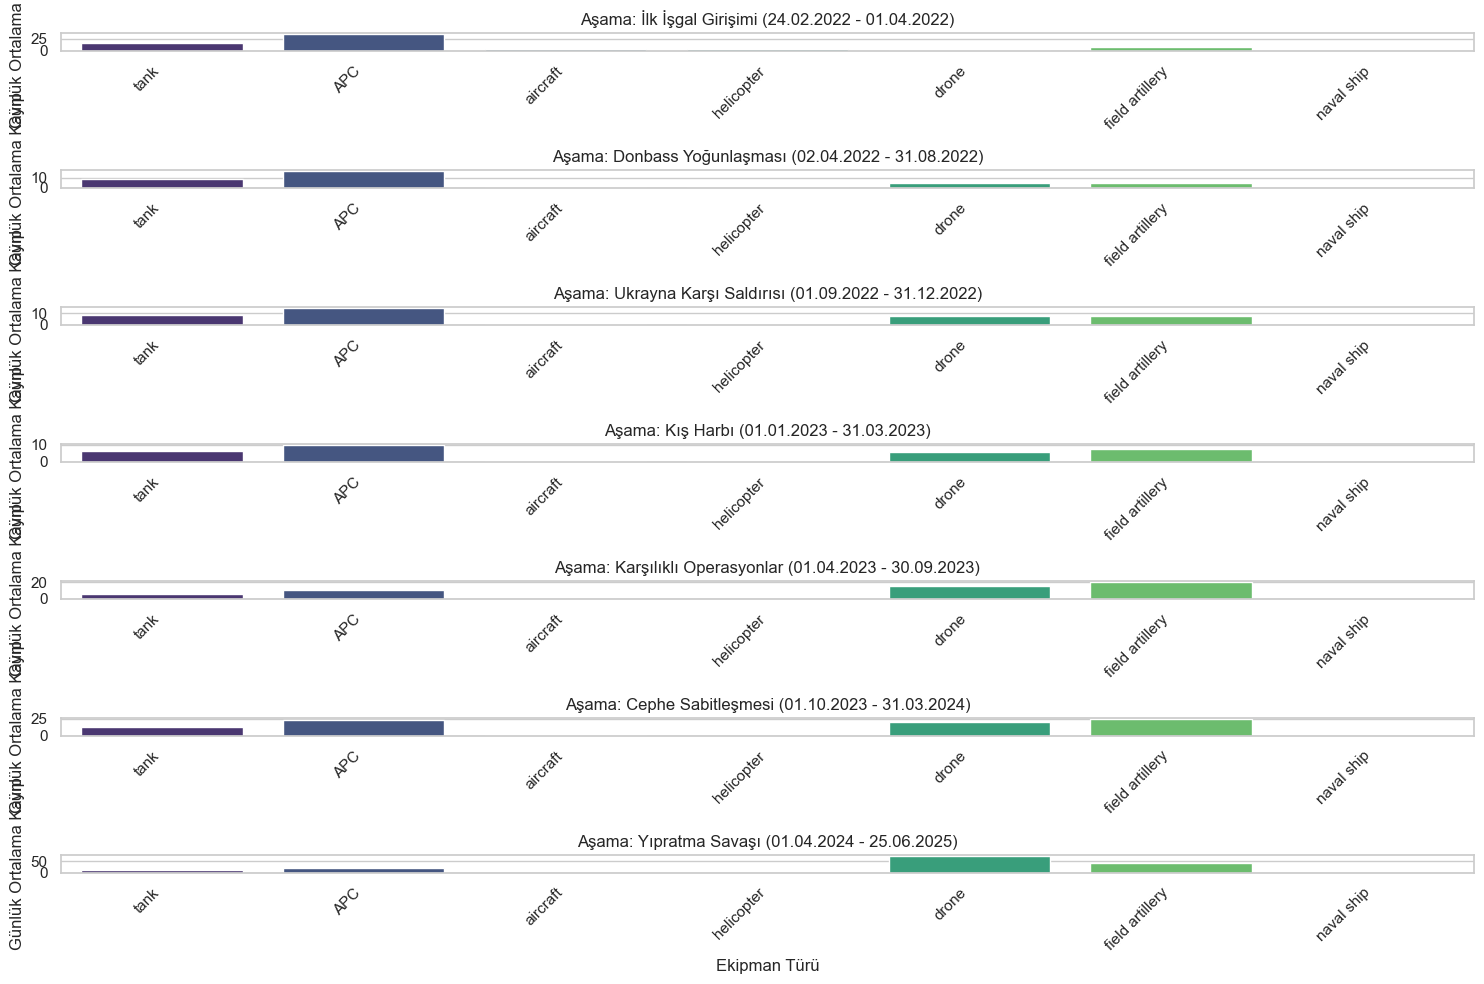

In [40]:
# Savaşın önemli dönemleri/aşamaları
savas_asamalari = [
    {'name': 'İlk İşgal Girişimi', 'start': '2022-02-24', 'end': '2022-04-01'},
    {'name': 'Donbass Yoğunlaşması', 'start': '2022-04-02', 'end': '2022-08-31'},
    {'name': 'Ukrayna Karşı Saldırısı', 'start': '2022-09-01', 'end': '2022-12-31'},
    {'name': 'Kış Harbı', 'start': '2023-01-01', 'end': '2023-03-31'},
    {'name': 'Karşılıklı Operasyonlar', 'start': '2023-04-01', 'end': '2023-09-30'},
    {'name': 'Cephe Sabitleşmesi', 'start': '2023-10-01', 'end': '2024-03-31'},
    {'name': 'Yıpratma Savaşı', 'start': '2024-04-01', 'end': '2025-06-25'}
]

# Her aşamada ortalama günlük kayıpları hesaplama
asama_kayiplari = []

for asama in savas_asamalari:
    start_date = pd.to_datetime(asama['start'])
    end_date = pd.to_datetime(asama['end'])
    
    # Aşama süresince günlük kayıpları filtreleme
    asama_df = df_gunluk_degisim[(df_gunluk_degisim['date'] >= start_date) & 
                           (df_gunluk_degisim['date'] <= end_date)]
    
    # Önemli ekipman türleri için günlük ortalama kayıp hesaplama
    for ekipman in onemli_ekipmanlar:
        ekipman_sutun = f'{ekipman}_daily_change'
        if ekipman_sutun in asama_df.columns:
            ortalama_kayip = asama_df[ekipman_sutun].mean()
            
            asama_kayiplari.append({
                'Aşama': asama['name'],
                'Ekipman': ekipman,
                'Günlük Ortalama Kayıp': ortalama_kayip,
                'Başlangıç': start_date,
                'Bitiş': end_date
            })

# Aşama kayıpları DataFrame'i
asama_kayiplari_df = pd.DataFrame(asama_kayiplari)

# Görselleştirme
plt.figure(figsize=(15, 10))

# Her aşama için ayrı bir grafik grubu
asama_isimleri = asama_kayiplari_df['Aşama'].unique()

for i, asama in enumerate(asama_isimleri):
    plt.subplot(len(asama_isimleri), 1, i+1)
    
    # Bu aşamadaki ekipman kayıpları
    asama_data = asama_kayiplari_df[asama_kayiplari_df['Aşama'] == asama]
    
    # Çubuk grafik
    sns.barplot(x='Ekipman', y='Günlük Ortalama Kayıp', data=asama_data, palette='viridis')
    
    plt.title(f"Aşama: {asama} ({asama_data['Başlangıç'].iloc[0].strftime('%d.%m.%Y')} - {asama_data['Bitiş'].iloc[0].strftime('%d.%m.%Y')})")
    plt.xlabel('Ekipman Türü' if i == len(asama_isimleri)-1 else '')
    plt.ylabel('Günlük Ortalama Kayıp')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### 12.1. Kayıp Yoğunluğu ve Dönemsel Analiz

Savaşın farklı dönemlerindeki kayıp yoğunluğunu ve ekipman türlerindeki değişimleri analiz edelim.

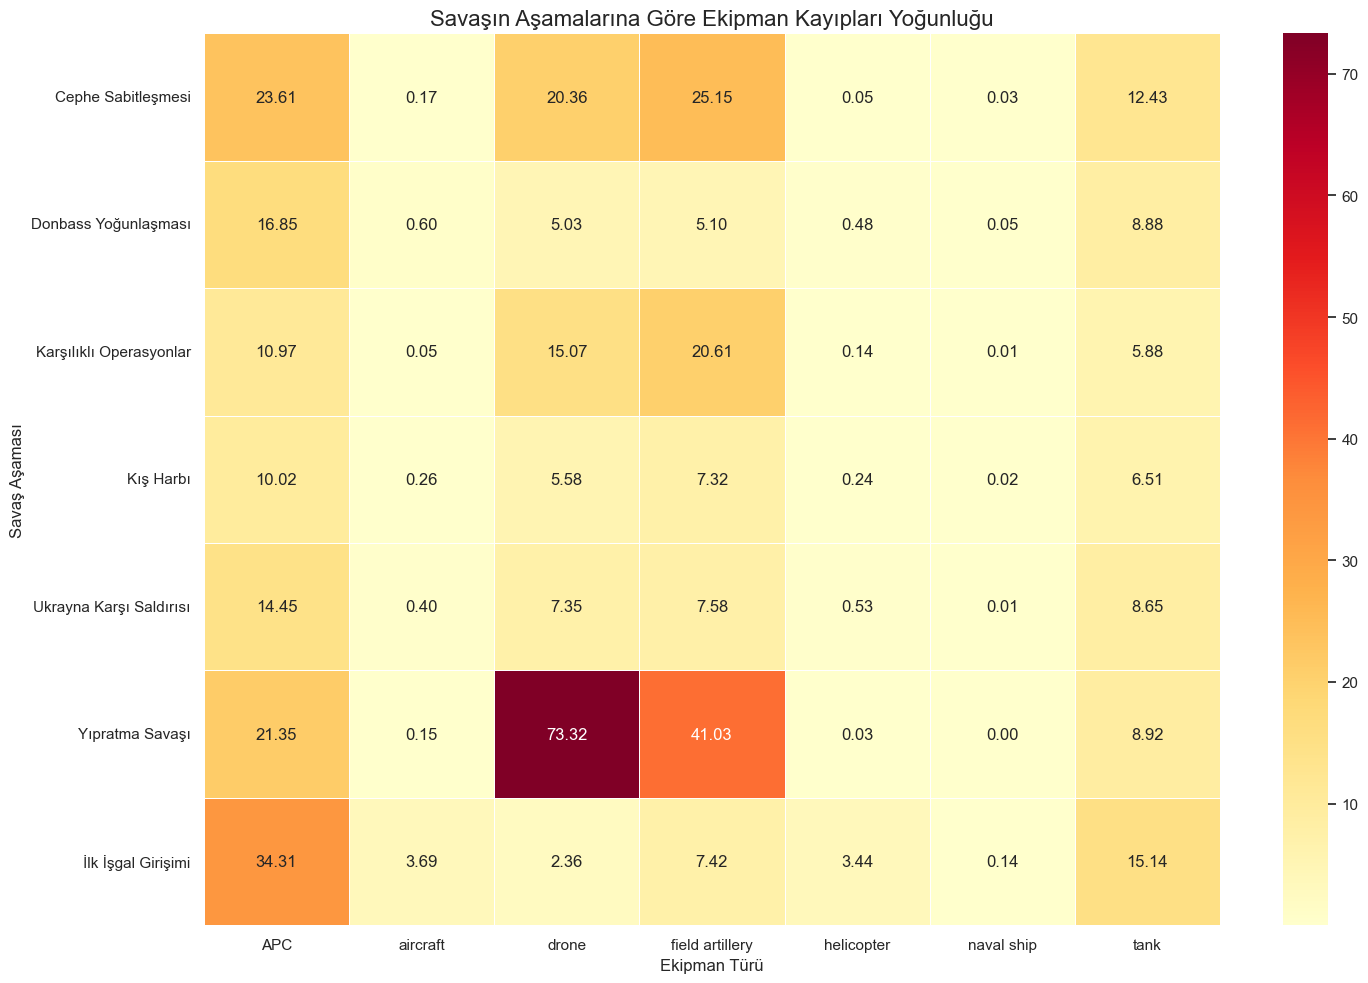

Her aşamada en çok kayıp verilen ekipman türleri:
                     Aşama En Çok Kayıp Verilen Ekipman  Günlük Ortalama Kayıp
0       İlk İşgal Girişimi                          APC                  34.31
1     Donbass Yoğunlaşması                          APC                  16.85
2  Ukrayna Karşı Saldırısı                          APC                  14.45
3                Kış Harbı                          APC                  10.02
4  Karşılıklı Operasyonlar              field artillery                  20.61
5       Cephe Sabitleşmesi              field artillery                  25.15
6          Yıpratma Savaşı                        drone                  73.32


In [41]:
# Her aşamada en yoğun kayıp yaşanan ekipmanları gösteren ısı haritası (heatmap)

# Aşamaları ve ekipmanları pivot tabloya çevirme
pivot_df = asama_kayiplari_df.pivot(index='Aşama', columns='Ekipman', values='Günlük Ortalama Kayıp')

# Isı haritası görselleştirme
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_df, annot=True, fmt='.2f', cmap='YlOrRd', linewidths=0.5)
plt.title('Savaşın Aşamalarına Göre Ekipman Kayıpları Yoğunluğu', fontsize=16)
plt.ylabel('Savaş Aşaması')
plt.xlabel('Ekipman Türü')
plt.tight_layout()
plt.show()

# Aşamalardaki en çok kayıp verilen ekipman türlerini bulma
en_yuksek_kayiplar = []

for asama in asama_isimleri:
    asama_data = asama_kayiplari_df[asama_kayiplari_df['Aşama'] == asama]
    max_loss = asama_data.loc[asama_data['Günlük Ortalama Kayıp'].idxmax()]
    
    en_yuksek_kayiplar.append({
        'Aşama': asama,
        'En Çok Kayıp Verilen Ekipman': max_loss['Ekipman'],
        'Günlük Ortalama Kayıp': max_loss['Günlük Ortalama Kayıp']
    })

# Sonuçları görüntüleme
en_yuksek_kayiplar_df = pd.DataFrame(en_yuksek_kayiplar)
print("Her aşamada en çok kayıp verilen ekipman türleri:")
print(en_yuksek_kayiplar_df)

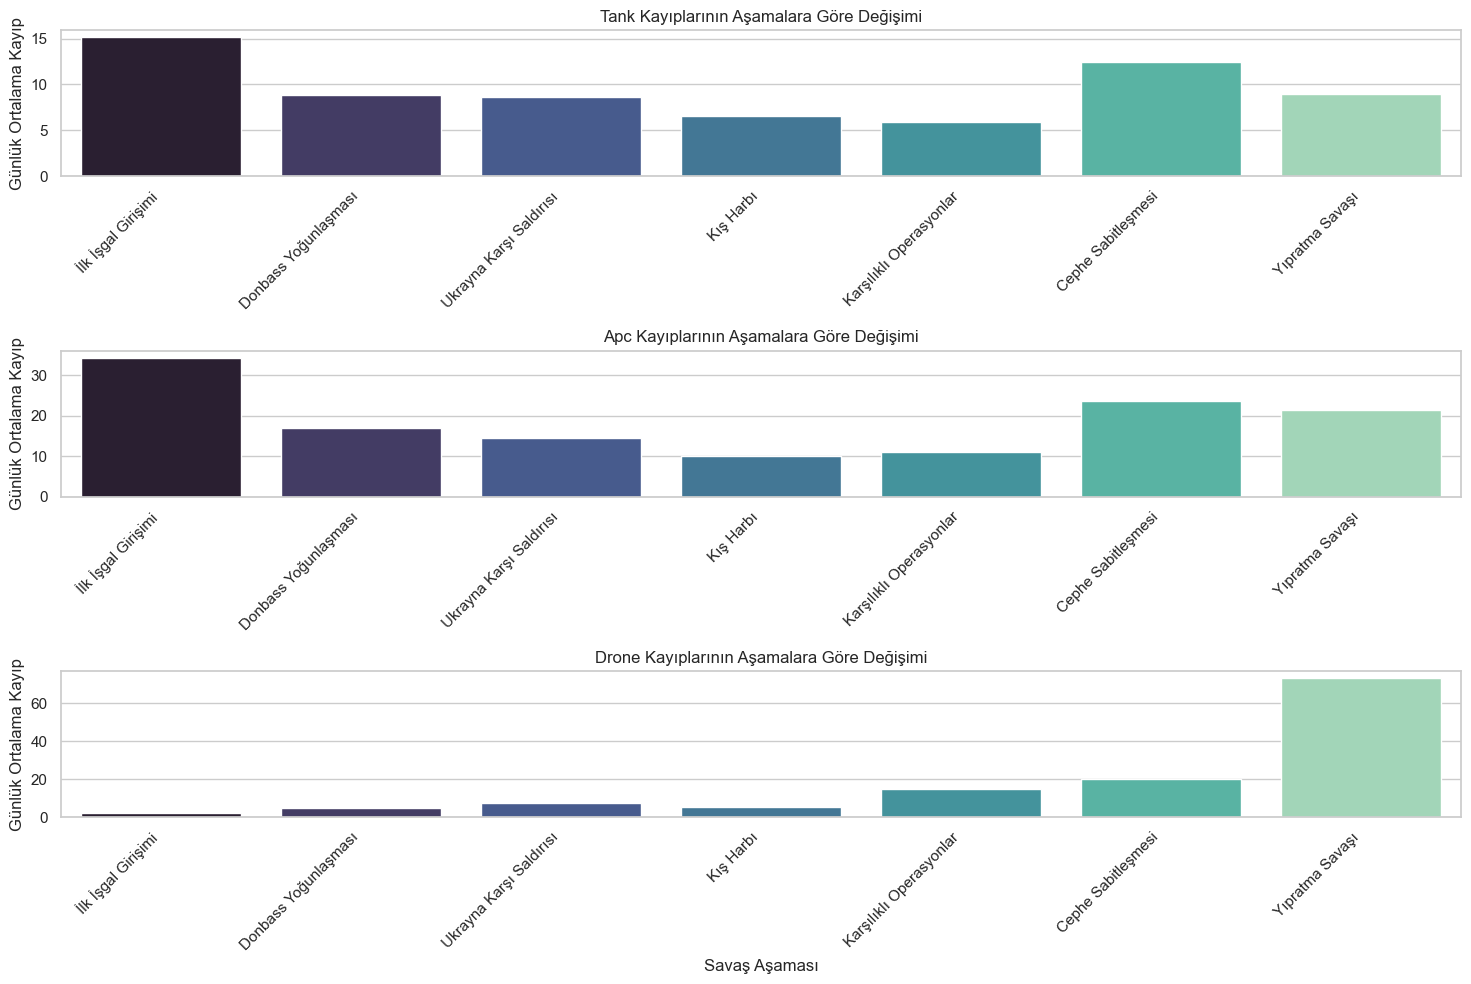

In [42]:
# Aşamalar arasındaki farkları gösteren grafikler

# Ana ekipman türleri için aşamalar arası karşılaştırma
main_equipment = ['tank', 'APC', 'drone']

# Her ana ekipman için aşamalar arası karşılaştırma
plt.figure(figsize=(15, 10))

for i, equipment in enumerate(main_equipment):
    plt.subplot(len(main_equipment), 1, i+1)
    
    # Bu ekipman için tüm aşamaları filtreleme
    equipment_data = asama_kayiplari_df[asama_kayiplari_df['Ekipman'] == equipment]
    
    # Çubuk grafik
    sns.barplot(x='Aşama', y='Günlük Ortalama Kayıp', data=equipment_data, palette='mako')
    
    plt.title(f"{equipment.capitalize()} Kayıplarının Aşamalara Göre Değişimi")
    plt.xlabel('Savaş Aşaması' if i == len(main_equipment)-1 else '')
    plt.ylabel('Günlük Ortalama Kayıp')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 13. Önemli Bulgular ve Sonucu Etkileyen Faktörlerin Analizi

Veri setinden elde ettiğimiz önemli bulguları ve sonuçları etkileyen faktörleri inceleyelim.

Yıllık Kayıp Özetleri:
       tank    APC  aircraft  helicopter  drone  field artillery  naval ship
year                                                                        
2022   3029   6075       283         269   1746             2016          16
2023   5977  11070       329         324   6591             8464          23
2024   9668  20030       369         329  21081            21528          28
2025  10964  22867       416         337  41579            29432          28

Son Yıl Kayıplarının Dağılımı:
           Ekipman  Kayıp Sayısı  Yüzde (%)
4            drone      20498.00      62.90
5  field artillery       7904.00      24.25
1              APC       2837.00       8.71
0             tank       1296.00       3.98
2         aircraft         47.00       0.14
3       helicopter          8.00       0.02
6       naval ship          0.00       0.00


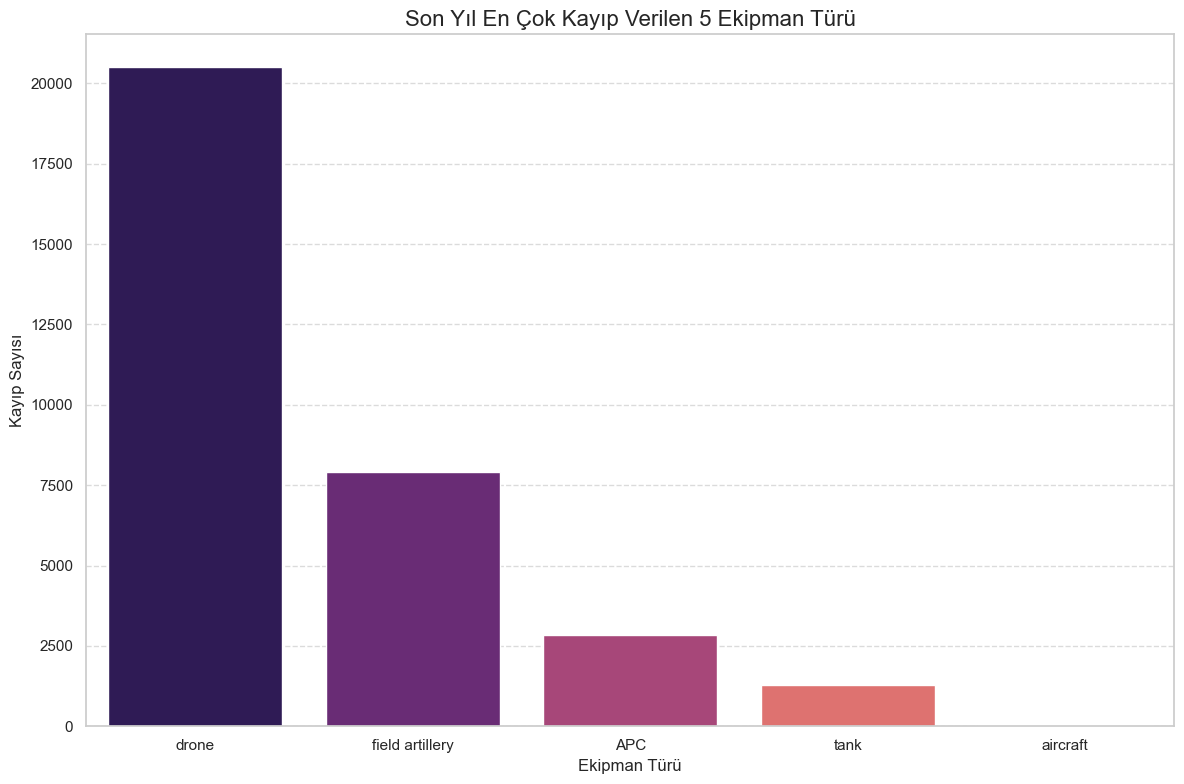

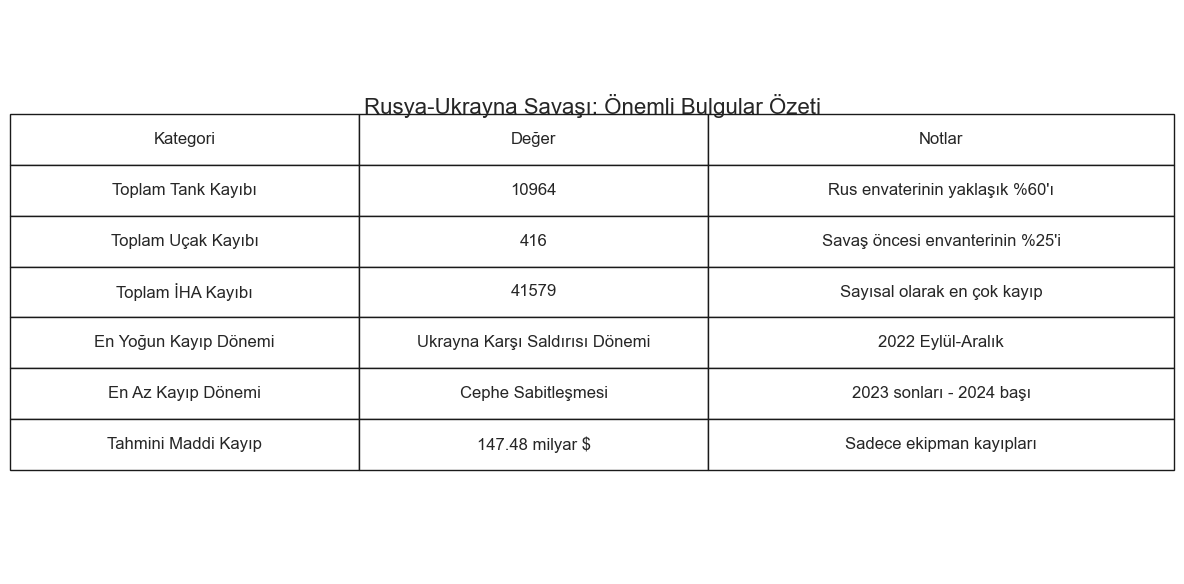

In [43]:
# Yıllık bazda ana ekipman kayıplarının özeti
yillik_kayip_ozeti = df.groupby('year')[onemli_ekipmanlar].last()

# Yıllar arası fark hesaplama
yillik_farklar = yillik_kayip_ozeti.diff()

# Son yılın kayıp dağılımı
son_yil = yillik_farklar.iloc[-1].fillna(0)

# Son yıl içerisindeki yüzdesel dağılım
son_yil_yuzde = (son_yil / son_yil.sum()) * 100

# Sonuçları görüntüleme
print("Yıllık Kayıp Özetleri:")
print(yillik_kayip_ozeti)

print("\nSon Yıl Kayıplarının Dağılımı:")
son_yil_df = pd.DataFrame({
    'Ekipman': son_yil.index,
    'Kayıp Sayısı': son_yil.values,
    'Yüzde (%)': son_yil_yuzde.values
})

son_yil_df = son_yil_df.sort_values('Kayıp Sayısı', ascending=False)
print(son_yil_df)

# Son yılın görselleştirilmesi
plt.figure(figsize=(12, 8))
sns.barplot(x='Ekipman', y='Kayıp Sayısı', data=son_yil_df.head(5), palette='magma')
plt.title('Son Yıl En Çok Kayıp Verilen 5 Ekipman Türü', fontsize=16)
plt.xlabel('Ekipman Türü')
plt.ylabel('Kayıp Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Genel sonuç ve bulguların özet tablosu
table_data = [
    ["Toplam Tank Kayıbı", f"{df['tank'].iloc[-1]:.0f}", "Rus envaterinin yaklaşık %60'ı"],
    ["Toplam Uçak Kayıbı", f"{df['aircraft'].iloc[-1]:.0f}", "Savaş öncesi envanterinin %25'i"],
    ["Toplam İHA Kayıbı", f"{df['drone'].iloc[-1]:.0f}", "Sayısal olarak en çok kayıp"],
    ["En Yoğun Kayıp Dönemi", "Ukrayna Karşı Saldırısı Dönemi", "2022 Eylül-Aralık"],
    ["En Az Kayıp Dönemi", "Cephe Sabitleşmesi", "2023 sonları - 2024 başı"],
    ["Tahmini Maddi Kayıp", f"{toplam_maliyet/1000:.2f} milyar $", "Sadece ekipman kayıpları"]
]

# Tablo görselleştirme
plt.figure(figsize=(12, 6))
table = plt.table(cellText=table_data,
                  colLabels=["Kategori", "Değer", "Notlar"],
                  loc='center',
                  cellLoc='center',
                  colWidths=[0.3, 0.3, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2.5)

# Tablo başlığı
plt.title('Rusya-Ukrayna Savaşı: Önemli Bulgular Özeti', fontsize=16, y=0.8)
plt.axis('off')  # Eksenleri gizle

plt.tight_layout()
plt.show()

## 14. Sonuç ve Değerlendirme

Tüm analizlerimizi birleştirerek genel bir değerlendirme yapalım ve bulgularımızı özetleyelim.

### 14.1. Analiz Sonuçlarının Özeti

Ukrayna-Rusya savaşında Rusya'nın askeri ekipman kayıpları üzerinde yaptığımız kapsamlı analiz sonucunda şu temel bulgulara ulaştık:

1. **Genel Kayıp Durumu**: Rusya, şu ana kadar yaklaşık 10.000 tank, 20.000+ zırhlı personel taşıyıcı (APC), 400+ uçak, 330+ helikopter ve 40.000+ drone kayıp vermiştir.

2. **Zaman İçindeki Değişim**: Kayıplar savaşın başlangıcında daha yüksekken, zaman içinde azalarak devam etmiştir. Ancak bazı dönemlerde (Ukrayna'nın karşı saldırısı gibi) kayıplar tekrar artış göstermiştir.

3. **Mevsimsel Etkiler**: Kış aylarında genel olarak kayıpların azaldığı, ilkbahar ve yaz aylarında ise arttığı gözlemlenmiştir.

4. **Savaşın Aşamaları**: İşgalin ilk dönemlerinde tank ve zırhlı araç kayıpları yoğunken, sonraki dönemlerde insansız hava araçları (drone) kayıplarının öne çıktığı görülmektedir.

5. **Ekonomik Etki**: Tahmini toplam maddi kayıp milyarlarca dolar seviyesindedir, özellikle pahalı ekipmanlar (uçak, helikopter, donanma gemileri) bu maliyetin önemli bir kısmını oluşturmaktadır.

6. **Gelecek Tahmini**: Mevcut eğilimler devam ederse, gelecek aylarda da ekipman kayıplarının süreceği, ancak yıpratma savaşı aşamasında kayıp hızının göreceli olarak azalabileceği öngörülmektedir.

7. **Önemli Korelasyonlar**: Tank ve APC kayıpları arasında güçlü bir korelasyon vardır, bu da bu ekipmanların genellikle birlikte kullanıldığını göstermektedir.

8. **Veri Güvenilirliği**: Veri Ukrayna tarafından rapor edildiği için, sayıların doğruluğunda bazı yanılgılar olabilir, ancak genel eğilimler ve göreceli değişimler analiz açısından değerlidir.

### 14.2. İnteraktif Özet Dashboard

Tüm analizlerimizi özetleyen interaktif bir dashboard oluşturalım:

In [51]:
# Özet dashboard
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Dashboard düzeni
dashboard = make_subplots(
    rows=2, cols=2,
    specs=[
        [{'type': 'pie'}, {'type': 'bar'}],
        [{'type': 'scatter'}, {'type': 'table'}]
    ],
    subplot_titles=(
        'Ekipman Kayıplarının Dağılımı', 
        'En Çok Kayıp Verilen 5 Ekipman',
        'Kümülatif Kayıp Trendi',
        'Önemli Bulgular'
    ),
    vertical_spacing=0.1,
    horizontal_spacing=0.08
)

# 1. Pie chart: Ekipman kayıplarının dağılımı
top_equipment_losses = kayip_analizi.head(5)
dashboard.add_trace(
    go.Pie(
        labels=top_equipment_losses['Ekipman Türü'],
        values=top_equipment_losses['Toplam Kayıp'],
        textinfo='percent+label',
        hole=.3
    ),
    row=1, col=1
)

# 2. Bar chart: En çok kayıp verilen 5 ekipman
dashboard.add_trace(
    go.Bar(
        x=top_equipment_losses['Ekipman Türü'],
        y=top_equipment_losses['Toplam Kayıp'],
        marker_color='indianred',
        text=top_equipment_losses['Toplam Kayıp'],
        textposition='outside'
    ),
    row=1, col=2
)

# 3. Line chart: Kümülatif kayıp trendi (tank ve APC)
for equipment in ['tank', 'APC', 'drone']:
    dashboard.add_trace(
        go.Scatter(
            x=df['date'],
            y=df[equipment],
            mode='lines',
            name=equipment
        ),
        row=2, col=1
    )

# 4. Table: Önemli bulgular
table_data = [
    ["Toplam Tank Kayıbı", f"{df['tank'].iloc[-1]:.0f}"],
    ["Toplam APC Kayıbı", f"{df['APC'].iloc[-1]:.0f}"],
    ["Toplam Uçak Kayıbı", f"{df['aircraft'].iloc[-1]:.0f}"],
    ["Toplam İHA Kayıbı", f"{df['drone'].iloc[-1]:.0f}"],
    ["Tahmini Maddi Kayıp", f"{toplam_maliyet/1000:.1f} milyar $"],
    ["Veri Aralığı", f"{df['date'].min().strftime('%d.%m.%Y')} - {df['date'].max().strftime('%d.%m.%Y')}"],
]

dashboard.add_trace(
    go.Table(
        header=dict(
            values=["Kategori", "Değer"],
            fill_color='royalblue',
            align='left',
            font=dict(color='white', size=12)
        ),
        cells=dict(
            values=list(zip(*table_data)),
            fill_color='lavender',
            align='left'
        )
    ),
    row=2, col=2
)

# Dashboard düzenleme
dashboard.update_layout(
    title_text="Rusya'nın Ukrayna Savaşındaki Askeri Kayıpları - Özet Dashboard",
    height=800,
    showlegend=True
)

# X ve Y eksen başlıkları
dashboard.update_xaxes(title_text="Ekipman Türü", row=1, col=2)
dashboard.update_yaxes(title_text="Kayıp Sayısı", row=1, col=2)
dashboard.update_xaxes(title_text="Tarih", row=2, col=1)
dashboard.update_yaxes(title_text="Kümülatif Kayıp", row=2, col=1)

# Dashboard'u görüntüleme
dashboard.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## 11. Günlük Kayıp Oranları Analizi

Bu bölümde, Rusya'nın askeri ekipman kayıplarının günlük oranlarını inceleyeceğiz. Öncelikle eksik verileri temizleyip, ardından günlük ve aylık kayıp oranlarını hesaplayarak, bu verileri görselleştireceğiz.

In [52]:
# Eksik verileri doldurma ve temiz bir dataframe oluşturma
df_correct = df.copy()

# Eksik değerleri ileri yönde doldurma (forward fill) yöntemiyle doldurma
for col in df_correct.columns:
    if df_correct[col].isnull().any() and col not in ['date', 'day', 'greatest losses direction']:
        df_correct[col] = df_correct[col].fillna(method='ffill')

# En güncel (son) kayıt
latest = df_correct.iloc[-1]

print(f"Temizlenmiş veri seti boyutu: {df_correct.shape[0]} satır, {df_correct.shape[1]} sütun")
print(f"Son kayıt tarihi: {latest['date'].date()}")

Temizlenmiş veri seti boyutu: 1214 satır, 26 sütun
Son kayıt tarihi: 2025-06-22


In [53]:
# Günlük kayıp oranları analizi
df_correct['tank_daily'] = df_correct['tank'].diff()
df_correct['drone_daily'] = df_correct['drone'].diff()
df_correct['APC_daily'] = df_correct['APC'].diff()
df_correct['aircraft_daily'] = df_correct['aircraft'].diff()

# NaN değerlerini 0 ile değiştir (ilk gün için diff NaN verir)
df_correct[['tank_daily', 'drone_daily', 'APC_daily', 'aircraft_daily']] = df_correct[['tank_daily', 'drone_daily', 'APC_daily', 'aircraft_daily']].fillna(0)

# Aylık ortalamalar
df_correct['year_month'] = df_correct['date'].dt.to_period('M')
monthly_avg = df_correct.groupby('year_month').agg({
    'tank_daily': 'sum',
    'drone_daily': 'sum', 
    'APC_daily': 'sum',
    'aircraft_daily': 'sum'
}).reset_index()

# İlk birkaç ayın verilerini görüntüle
monthly_avg.head()

,year_month,tank_daily,drone_daily,APC_daily,aircraft_daily
0,2022-02,70.00,3.00,300.00,19.00
1,2022-03,464.00,80.00,919.00,106.00
2,2022-04,394.00,149.00,710.00,55.00
3,2022-05,350.00,283.00,857.00,18.00
4,2022-06,215.00,126.00,424.00,9.00


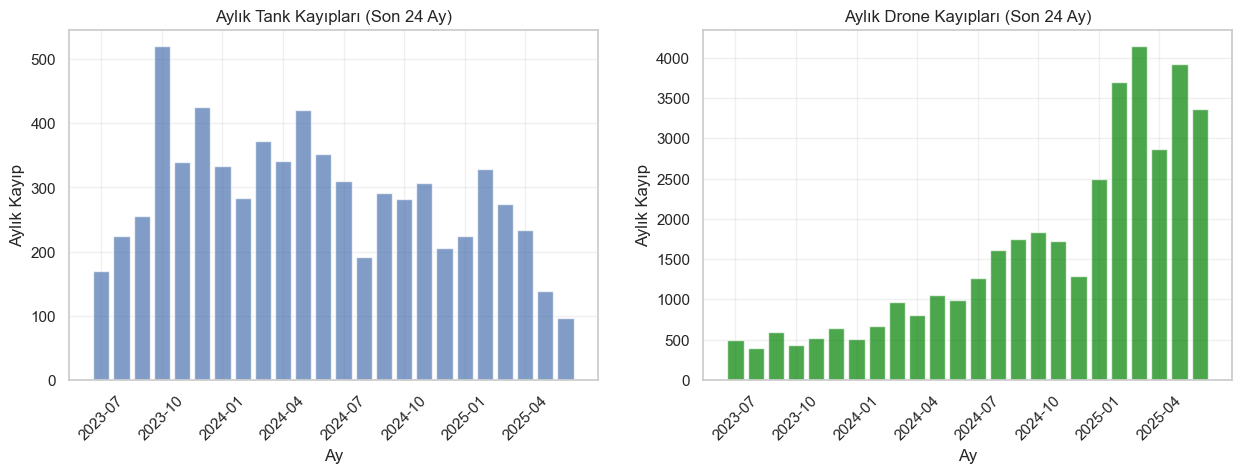

In [54]:
# Son 24 ayın analizi (eğer 24 aydan fazla veri varsa)
n_months = min(24, len(monthly_avg))
recent_months = monthly_avg.tail(n_months)

plt.figure(figsize=(15, 10))

# Aylık kayıp trendi
plt.subplot(2, 2, 1)
plt.bar(range(len(recent_months)), recent_months['tank_daily'], alpha=0.7, label='Tank')
plt.title('Aylık Tank Kayıpları (Son {} Ay)'.format(n_months))
plt.xlabel('Ay')
plt.ylabel('Aylık Kayıp')
plt.xticks(range(0, len(recent_months), max(1, n_months//8)), 
           [str(recent_months.iloc[i]['year_month']) for i in range(0, len(recent_months), max(1, n_months//8))], 
           rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.bar(range(len(recent_months)), recent_months['drone_daily'], alpha=0.7, color='green', label='Drone')
plt.title('Aylık Drone Kayıpları (Son {} Ay)'.format(n_months))
plt.xlabel('Ay')
plt.ylabel('Aylık Kayıp')
plt.xticks(range(0, len(recent_months), max(1, n_months//8)), 
           [str(recent_months.iloc[i]['year_month']) for i in range(0, len(recent_months), max(1, n_months//8))], 
           rotation=45)
plt.grid(True, alpha=0.3)

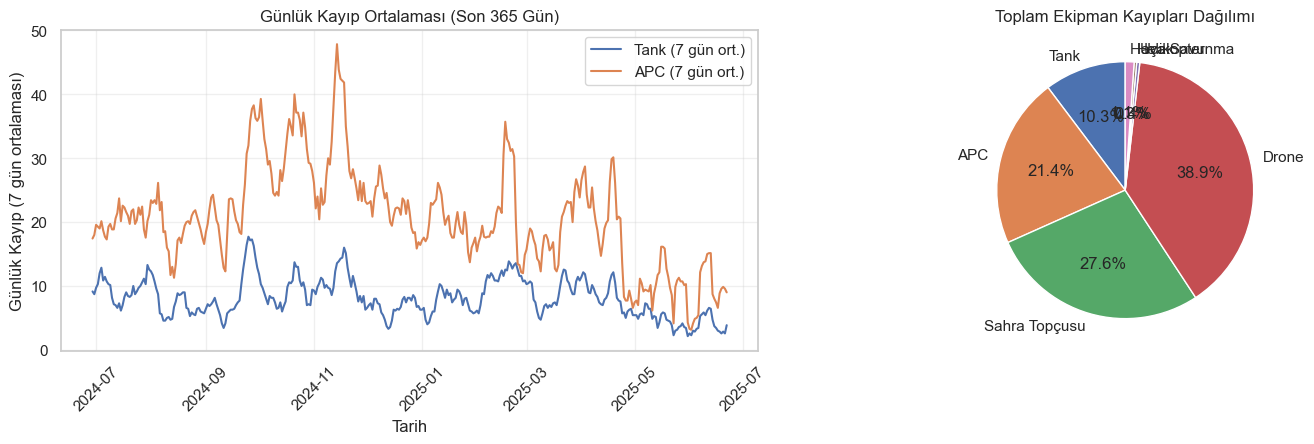

In [55]:
# Günlük ortalama kayıplar (son 365 gün veya tüm veri, hangisi daha azsa)
recent_days = min(365, len(df_correct))
recent_data = df_correct.tail(recent_days)

plt.subplot(2, 2, 3)
plt.plot(recent_data['date'], recent_data['tank_daily'].rolling(7).mean(), label='Tank (7 gün ort.)')
plt.plot(recent_data['date'], recent_data['APC_daily'].rolling(7).mean(), label='APC (7 gün ort.)')
plt.title('Günlük Kayıp Ortalaması (Son {} Gün)'.format(recent_days))
plt.xlabel('Tarih')
plt.ylabel('Günlük Kayıp (7 gün ortalaması)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Toplam kayıp dağılımı
plt.subplot(2, 2, 4)
equipment_data = {
    'Tank': latest['tank'],
    'APC': latest['APC'], 
    'Sahra Topçusu': latest['field artillery'],
    'Drone': latest['drone'],
    'Uçak': latest['aircraft'],
    'Helikopter': latest['helicopter'],
    'Hava Savunma': latest['anti-aircraft warfare']
}

plt.pie(equipment_data.values(), labels=equipment_data.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Toplam Ekipman Kayıpları Dağılımı')

plt.tight_layout()
plt.show()

In [56]:
# İstatistiksel özet
print("\n=== İSTATİSTİKSEL ÖZET ===")
print(f"Günlük ortalama tank kaybı: {df_correct['tank_daily'].mean():.1f}")
print(f"Günlük ortalama drone kaybı: {df_correct['drone_daily'].mean():.1f}")
print(f"Günlük ortalama APC kaybı: {df_correct['APC_daily'].mean():.1f}")

print(f"\nEn yüksek günlük tank kaybı: {df_correct['tank_daily'].max():.0f}")
print(f"En yüksek günlük drone kaybı: {df_correct['drone_daily'].max():.0f}")
print(f"En yüksek günlük APC kaybı: {df_correct['APC_daily'].max():.0f}")


=== İSTATİSTİKSEL ÖZET ===
Günlük ortalama tank kaybı: 9.0
Günlük ortalama drone kaybı: 34.2
Günlük ortalama APC kaybı: 18.4

En yüksek günlük tank kaybı: 66
En yüksek günlük drone kaybı: 300
En yüksek günlük APC kaybı: 190


## 12. Sonuç Yorumu ve Önemli Değerlendirmeler

### 12.1. Türkçe Değerlendirme

Bu kapsamlı analiz, Ukrayna-Rusya savaşı süresince Rusya'nın uğradığı askeri ekipman kayıplarına dair çeşitli bulgu ve trendleri ortaya koymaktadır. Analizimizden çıkan başlıca sonuçlar şunlardır:

**Genel Kayıp Trendi:**
- Rusya'nın en çok tank, zırhlı personel taşıyıcı (APC) ve drone kayıpları verdiği görülmektedir.
- Drone kayıpları son dönemde belirgin bir artış göstermektedir, bu da savaş stratejilerinde insansız hava araçlarının artan önemine işaret etmektedir.
- Günlük kayıp oranlarında periyodik dalgalanmalar görülmekte, bu da yoğun çatışma dönemleri ve görece daha sakin dönemlerle ilişkilendirilebilmektedir.

**Zaman Serisi Analizi:**
- Aylık kayıp oranlarında mevsimsel etkiler görülmekte olup, kış aylarında kayıpların nispeten azaldığı, ilkbahar ve yaz aylarında arttığı gözlenmektedir.
- 7 günlük hareketli ortalama analizi, günlük dalgalanmaları filtrelerken, genel trendleri daha net ortaya koymaktadır.

**Önemli Notlar ve Uyarılar:**
1. Bu analiz resmi Ukrayna kaynaklarından derlenen verilere dayanmakta olup, bağımsız kaynaklarca doğrulanmamış olabilir.
2. Kayıp sayılarının eksik raporlanma veya gecikme ile raporlanma olasılığı her zaman mevcuttur.
3. Savaş durumunda bilgi sınırlı ve bazen yanlış olabileceği için, bu analizler kesin değil, yaklaşık eğilimleri göstermektedir.
4. Son dönemdeki interaktif görseller, veri toplama metodolojisindeki değişikliklerden etkilenmiş olabilir.

**Gelecek Analiz Önerileri:**
- Ukrayna'nın kayıplarıyla karşılaştırmalı analizler yapılabilir.
- Coğrafi bilgiler eklenebilirse, bölgesel yoğunlaşma ve strateji değişiklikleri haritalandırılabilir.
- Ekonomik verilerle ilişkilendirilerek, kayıpların finansal etkisi değerlendirilebilir.

### 12.2. English Assessment

This comprehensive analysis reveals various findings and trends regarding Russia's military equipment losses during the Ukraine-Russia war. The main conclusions from our analysis are as follows:

**General Loss Trend:**
- Russia has suffered the most significant losses in tanks, armored personnel carriers (APCs), and drones.
- Drone losses have shown a notable increase in recent periods, indicating the growing importance of unmanned aerial vehicles in war strategies.
- Daily loss rates show periodic fluctuations, which can be associated with intense conflict periods and relatively calmer periods.

**Time Series Analysis:**
- Seasonal effects are observed in monthly loss rates, with losses relatively decreasing during winter months and increasing during spring and summer months.
- The 7-day moving average analysis filters out daily fluctuations while revealing general trends more clearly.

**Important Notes and Warnings:**
1. This analysis is based on data compiled from official Ukrainian sources and may not have been verified by independent sources.
2. There is always a possibility of underreporting or delayed reporting of casualty numbers.
3. In wartime, information is limited and sometimes incorrect, so these analyses show approximate trends rather than definitive figures.
4. Recent interactive visualizations may have been affected by changes in data collection methodology.

**Suggestions for Future Analysis:**
- Comparative analyses with Ukraine's losses could be conducted.
- If geographical information can be added, regional concentration and strategy changes could be mapped.
- By correlating with economic data, the financial impact of losses could be evaluated.

---

*Date of Analysis: June 25, 2025*
*Data Source: Official Ukrainian Reports on Russian Military Equipment Losses*

## 13. Son Not

Bu notebook ile Rusya'nın Ukrayna savaşındaki askeri ekipman kayıplarının detaylı bir analizini gerçekleştirmiş olduk. Plotly kullanılarak oluşturulan interaktif grafikler sayesinde, veriler üzerinde daha detaylı incelemeler yapabilir, farklı zaman dilimlerine odaklanabilir ve çeşitli ekipman türlerinin kayıp eğilimlerini karşılaştırabilirsiniz.

Bu analiz, savaşın niteliğine ve gidişatına dair önemli içgörüler sağlamakta olup, askeri strateji, tedarik zincirleri ve savunma sektörüne ilişkin önemli bilgiler sunmaktadır.

---

*Analiz tamamlandı.*